
# Machine Learning Process Report: **HW 3 Classification problems**


สมาชิกในกลุ่ม

- 65340500001

- 65340500015

- 65340500053

- 65340500063

Guidelines
The goal of the case study is to learn from medical data


**The flow (Key steps) of the case study is as below:**

1.  Reading the data in python and data description
2.  Defining the problem statement
3.  Looking at the distribution of Target variable
4.  Conduct basic exploration to reject irrelevant columns
5.  Visual Exploratory Data Analysis for data distribution (Analysis 1)
- Visualize data (histograms, bar charts, etc.) to assess distributions
- Identify skewed features and potential outliers
6.  Outlier treatment & Skewness treatment
7.  Missing Values treatment
8.  Feature selection by Visual correlation analysis
- correlation, statistical tests, and updated visualizations to select features. (ANOVA and chi-square) (Analysis 2)
9.  Finalize predictors for machine learning
10. Data Pre-processing for Machine Learning
11. Model construction
12. Results Analysis


# 0.Import package and data into pandas dataframe

Data set source: https://archive.ics.uci.edu/dataset/880/support2

Classification (*HW3*): Target is death


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, KFold

from sklearn.linear_model import LogisticRegression
from sklearn import metrics, tree
from sklearn.metrics import roc_curve, auc, classification_report,confusion_matrix

# 1.Reading the data into python and data description


You can download the data required for this case study here:
https://archive.ics.uci.edu/dataset/880/support2


On google collab, you can directly import your file
"https://archive.ics.uci.edu/static/public/880/data.csv"


List of Features Columns:
- death: The target variable indicating mortality status (0 for alive, 1 for deceased). This is the variable we are trying to predict.
(Target for this model training)

- age: The age of the individual. Age is often a critical predictor in health datasets as risk factors for various health outcomes, including mortality, often increase with age.

- sex: The gender of the individual, likely encoded as ‘male’ or ‘female’. Gender can sometimes play a role in health outcomes, as certain conditions may have different risks based on gender.

- hospdead: This feature seems to indicate hospital death, potentially a flag for whether the individual passed away in the hospital. This could correlate closely with the death variable.

- slos: Likely an abbreviation for “stay length of stay” or similar, indicating the number of days the individual stayed in the hospital. Length of stay can indicate the severity of illness, as longer stays are often associated with more severe conditions.

- d.time: Duration or time, potentially indicating the time in days related to the condition or treatment timeline. This feature may relate to survival duration or the time until a critical outcome.

- dzgroup: Disease group, which classifies the individual's primary diagnosis or health condition (e.g., “Lung Cancer,” “Cirrhosis,” etc.). Different disease groups have varying risks, which can influence mortality.

- dzclass: Disease class, a broader categorization of health conditions that might group several related diagnoses (e.g., “Cancer,” “ARF/MOSF” for Acute Respiratory Failure/Multi-Organ System Failure). This may be useful for modeling as it gives context on the health issues each individual faces.

- num.co: Likely the number of comorbidities, indicating how many additional health conditions the individual has. More comorbidities generally increase health risks, which could affect the target variable (death).

- crea: Creatinine levels, a marker related to kidney function. High levels may indicate kidney issues, which can be a significant health risk.

- sod: Sodium levels. Electrolyte imbalances, including abnormal sodium levels, can have serious health implications.

- ph: Blood pH level, which can indicate the acid-base balance in the body. Deviations from normal pH levels may signal critical health issues.

- glucose: Blood glucose levels, which can indicate issues like diabetes or hyper/hypoglycemia. Both high and low levels can be harmful, especially in critical health conditions.

- bun: Blood urea nitrogen, another marker for kidney function. Elevated BUN can indicate kidney disease or dehydration, which may be relevant to health outcomes.

- urine: This appears to be a numeric or categorical feature related to urine tests or outputs, which can help assess kidney function or other metabolic conditions.

- adlp: Possibly an abbreviation for “Activities of Daily Living - Physical,” indicating the individual’s physical functional status. Lower scores may indicate limited mobility or health deterioration.

- adls: Likely similar to adlp, this could indicate the individual’s functional status in “Activities of Daily Living - Social.” Functional independence can be a good predictor of overall health.

- sfmd2: This feature appears to contain descriptions related to follow-ups or specific medical instructions (e.g., “<2 mo. follow-up”). It may provide insights into the healthcare plan or prognosis.

- adlsc:Possibly another measure of “Activities of Daily Living - Cognitive,” assessing the cognitive function of individuals. Lower values might indicate cognitive impairment, often associated with higher health risks.

In [ ]:
dataframe = pd.read_csv("https://archive.ics.uci.edu/static/public/880/data.csv")
dataframe.head()
# dataframe.isnull().sum()

,id,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
0,1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,...,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.0
1,2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,...,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0
2,3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,...,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0
3,4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,...,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0
4,5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0


# 2.Define the problem statement
        
## **Problem Statement**

- The goal is to learn from the patient dataset and predict if a patient will die during the hospital stay based on various health-related features.
- Create a Predictive model which can tell whether the patient will die/survive during their stay at hospital.

## **Task**

Create a predictive model that can determine whether a patient is likely to die (death=1) or survive (death=0) based on features such as age, disease group, lab results, and other medical indicators.

- **Target Variable**: "death"
death=1: Patient died.
death=0: Patient survived.


- **Predictors:** age, sex, slos, num.co, crea, sod, ph, etc.
(other health indicators available in the dataset)


- **Samples:** Patients admitted to the hospital, with a record of whether they survived or not, from Record of 9,105 hospitalized patients

## **Determining the type of Machine Learning**

Based on the problem statement you can understand that we need to create a supervised ML classification model, as the target variable is categorical.

## **Basic assumption :**
1. Health Indicators: Disease group, age, and health metrics (e.g., lab results) are likely strong predictors since they provide direct insights into patient health status.
2. Time-Related Variables: Features related to time (e.g., days until discharge) might impact survival, though a shorter stay could mean either a mild condition (quick discharge) or a severe case (early death), effects could vary based on the patient's treatment and condition severity.
3. Potentially Non-Influential Features: Demographic data (e.g., sex and race) might have limited relevance to survival, so their impact may be minimal or non-significant for this model.
4. Above all, some less severe diseases may still have higher fatality rates in specific populations or genetics. "Interaction Feature" might be required for extra accuracy



#3.Looking at the distribution of Target

<Axes: xlabel='death'>

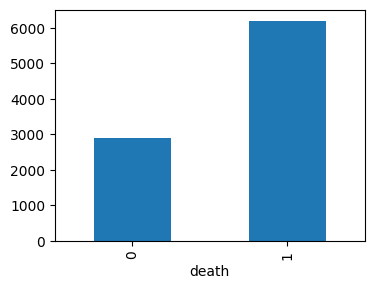

In [ ]:
# plot out distribution of the target's variable "death"
GroupedData = dataframe.groupby('death').size()
GroupedData.plot(kind='bar', figsize=(4,3))

## Target distribution interpretation
  The graph show skewness toward '1' or death patient showing that there are least than half patient who have survived, the skewness may affect the model
  

  Techniques like class balancing (oversampling, undersampling) or using algorithms that handle imbalance (e.g., Random Forest, XGBoost) can help improve performance.

  but since both class have reasonable number of samples, we can proceed as is


#4.Basic feature exploration to reject irrelevant columns

This step is performed to guage the overall data. The volume of usable data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process.

## 4.1 Basic column rejection

"id" is rejected because it's just an identifier
"hospdead" is also rejected because we won't predict "death" from a dead patient

Most of the other columns, particularly those related to patient demographics, health conditions, lab results, and functional status, are retained for further analysis, as they are likely to contribute to the model's ability to predict mortality.

### Column rejection result:
- "id" and "hospdead" column removed
- "death" the target column is separated
- the remaining feature are stored in "feature_DF"


In [ ]:
# ตัวแปร id ไม่ได้ใช้เลยเอาออก
_ = dataframe.pop("id")
_ = dataframe.pop("hospdead")

# แยกข้อมูล "death" ซึ่งเป็น Target ออกมา
target_DF = dataframe.pop("death")

# แยก Feature ออกมาจากข้อมูล
feature_DF = dataframe.loc[:, :]

## 4.2 Identify and Filter unusable data
In this case, some features of the source dataset may be missing or insufficient in volume, rendering them unusable.
while also spotting missing values to be filled after the process.

Therefore, the following procedures will be implemented.
1. Check for duplicated data.
2. Drop features with significant amount of missing value (>30%).
3. Drop rows with significant amount of missing value.



In [ ]:
# เช็คว่าข้อมูลซ้ำกันหรือไม่ (ไม่มีข้อมูลซ้ำ)
# False = ไม่มีซ้ำ
# True = ซ้ำ
print(dataframe.duplicated().any())

False


In [ ]:
# หา Feature ที่มี Nan และจำนวน Data ที่เป็น Nan
nan_count = feature_DF[feature_DF.columns].isna().sum().to_list()
nan_count = zip(feature_DF.columns, feature_DF.dtypes, nan_count)

# แยกเอาเฉพาะ Column ที่มี Nan
nan_count = [c for c in nan_count if c[2] != 0]

# คำนวณจำนวน Nan เป็นเปอร์เซ็นต์เทียบกับ List ทั้งหมด
nan_count = [(c[0], c[1], c[2], "{:.2f} %".format(c[2] * 100 / feature_DF.shape[0])) for c in nan_count]
sorted(nan_count, key=lambda x: x[2], reverse=True)



[('adlp', dtype('float64'), 5641, '61.95 %'),
 ('urine', dtype('float64'), 4862, '53.40 %'),
 ('glucose', dtype('float64'), 4500, '49.42 %'),
 ('bun', dtype('float64'), 4352, '47.80 %'),
 ('totmcst', dtype('float64'), 3475, '38.17 %'),
 ('alb', dtype('float64'), 3372, '37.03 %'),
 ('income', dtype('O'), 2982, '32.75 %'),
 ('adls', dtype('float64'), 2867, '31.49 %'),
 ('bili', dtype('float64'), 2601, '28.57 %'),
 ('pafi', dtype('float64'), 2325, '25.54 %'),
 ('ph', dtype('float64'), 2284, '25.09 %'),
 ('prg2m', dtype('float64'), 1649, '18.11 %'),
 ('edu', dtype('float64'), 1634, '17.95 %'),
 ('prg6m', dtype('float64'), 1633, '17.94 %'),
 ('sfdm2', dtype('O'), 1400, '15.38 %'),
 ('totcst', dtype('float64'), 888, '9.75 %'),
 ('wblc', dtype('float64'), 212, '2.33 %'),
 ('charges', dtype('float64'), 172, '1.89 %'),
 ('avtisst', dtype('float64'), 82, '0.90 %'),
 ('crea', dtype('float64'), 67, '0.74 %'),
 ('race', dtype('O'), 42, '0.46 %'),
 ('dnr', dtype('O'), 30, '0.33 %'),
 ('dnrday', dtyp

In [ ]:
#target check missing value
target_DF.isna().sum()

#count death
death_counts = target_DF.value_counts()

print(death_counts)

death
1    6201
0    2904
Name: count, dtype: int64


In [ ]:
# Drop row with >30% missing data
cut_threshold = math.floor(feature_DF.shape[0] * 0.3)
drop_list = [i[0] for i in nan_count if i[2] > cut_threshold]

# for col in drop_list:
feature_DF = feature_DF.drop(columns = drop_list)



In [ ]:
# ลองหา Row ที่ Data "scoma" หายไป พบว่าเป็น Row เดียวกันที่ "sps", "aps"... หายไปด้วย
# Row ดังกล่าว (Row 5393 or 3595) รวมแล้วมี Feature หายไปทั้งหมด 18 จากทั้งหมด 46

print(feature_DF.loc[feature_DF["scoma"].isna()].stack(future_stack = True))
print(dataframe.loc[5393].isna().sum(), "/", dataframe.shape[1])



5393  age                  62.52197
      sex                      male
      slos                        3
      d.time                      3
      dzgroup     ARF/MOSF w/Sepsis
      dzclass              ARF/MOSF
      num.co                      2
      edu                      16.0
      scoma                     NaN
      charges                   NaN
      totcst                    NaN
      avtisst                   NaN
      race                    white
      sps                       NaN
      aps                       NaN
      surv2m                    NaN
      surv6m                    NaN
      hday                        1
      diabetes                    1
      dementia                    0
      ca                         no
      prg2m                     NaN
      prg6m                     NaN
      dnr                       NaN
      dnrday                    NaN
      meanbp                   55.0
      wblc                13.099609
      hrt                   

In [ ]:
# ดังนั้นจึงตัดสินใจ Drop row นี้ทิ้ง
feature_DF.drop(5393, inplace=True)
dataframe.drop(5393, inplace=True)
target_DF.drop(5393, inplace=True)

In [ ]:
# ลองหา Row ที่ Data "temp" หายไป พบว่าเป็น Row เดียวกันที่ "hrt", "wblc"... หายไปด้วย
# Row ดังกล่าว (Row 5440) รวมแล้วมี Feature หายไปทั้งหมด 18 จากทั้งหมด 46

print(feature_DF.loc[feature_DF["temp"].isna()].stack(future_stack = True))
print(dataframe.loc[5440].isna().sum(), "/", dataframe.shape[1])

5440  age                  55.52597
      sex                    female
      slos                       47
      d.time                     56
      dzgroup     ARF/MOSF w/Sepsis
      dzclass              ARF/MOSF
      num.co                      2
      edu                      12.0
      scoma                     0.0
      charges               92466.0
      totcst                    NaN
      avtisst                 26.25
      race                    white
      sps                 31.398438
      aps                      60.0
      surv2m                 0.7229
      surv6m               0.638916
      hday                        1
      diabetes                    1
      dementia                    0
      ca                         no
      prg2m                     0.8
      prg6m                     0.8
      dnr                    no dnr
      dnrday                   47.0
      meanbp                    NaN
      wblc                      NaN
      hrt                   

In [ ]:
# ดังนั้นจึงตัดสินใจ Drop row นี้ทิ้ง
feature_DF.drop(5440, inplace=True)
dataframe.drop(5440, inplace=True)
target_DF.drop(5440, inplace=True)


### Identification & Filtering results

1. **Check for Duplicate or Extra Data**  
   - No duplicate data found.
2. **Remove Features with More Than 30% Missing Values**  
   - Removed: `adlp`, `urine`, `glucose`, `bun`, `totmcst`, `alb`, `income`, and `adls`.
3. **Remove Rows with Many Missing Values**  
  3.1 Removal (>30% missing)
   - **Row 5393**: Missing values in `scoma`, `sps`, `aps`, and more.  
   - **Row 5440**: Missing `temp`, `hrt`, `wblc`, and more.  
   - Both rows had 18 out of 46 features missing, so they were removed.
  3.2 Missing data to be filled (<=30% missing)
        'slos', 'd.time', 'num.co', 'edu', 'scoma','charges','totcst',
        'avtisst','sps', 'aps', 'surv2m', 'surv6m','hday', 'dnrday', 'resp', 'bili'
  

## 4.3 Feature column identification
- This step is done for initial assessment of the data to identify which columns are Categorical or Continuous for later process.
- We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

*but in this case we're only counting < 9 unique values as catagorical as it is the most unique value our catagorical data have (and to separate num.co, scoma which have 9-10 unique value )


In [ ]:
# Calculate the number of unique values in each column
unique_counts = feature_DF.nunique()

# Separate categorical and continuous features
feature_cat_col = unique_counts[unique_counts < 9].index.tolist()  # Categorical features with < 9 unique values
feature_con_col = unique_counts[unique_counts >= 9].index.tolist()  # Continuous features with ≥ 9 unique values

# # Known continuous features based on domain knowledge
# known_continuous_features = ["scoma", "num.co"]

print("Catagorical column: ",feature_cat_col, len(feature_cat_col))
print("Continuous column: ", feature_con_col , len(feature_con_col))


Catagorical column:  ['sex', 'dzgroup', 'dzclass', 'race', 'diabetes', 'dementia', 'ca', 'dnr', 'sfdm2'] 9
Continuous column:  ['age', 'slos', 'd.time', 'num.co', 'edu', 'scoma', 'charges', 'totcst', 'avtisst', 'sps', 'aps', 'surv2m', 'surv6m', 'hday', 'prg2m', 'prg6m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'bili', 'crea', 'sod', 'ph', 'adlsc'] 28


### Type of data

- The results is as printed showing this data has
  - 9 categorical
          Catagorical column:  ['sex', 'dzgroup', 'dzclass', 'race', 'diabetes', 'dementia', 'ca', 'dnr', 'sfdm2']
  - 28 continuous data
          Continuous column:  ['age', 'slos', 'd.time', 'num.co', 'edu', 'scoma', 'charges', 'totcst', 'avtisst', 'sps', 'aps', 'surv2m', 'surv6m', 'hday', 'prg2m', 'prg6m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'bili', 'crea', 'sod', 'ph', 'adlsc']
- **Note** : in this case "scoma" and "num.co" are continuous data with have a few unique values due to the discrete nature of the data.

Categorical Features:['sex', 'dzgroup', 'dzclass', 'race', 'diabetes', 'dementia', 'ca', 'dnr', 'sfdm2']

Continuous Features:['age', 'slos', 'd.time', 'num.co', 'edu', 'scoma', 'charges', 'totcst', 'avtisst', 'sps', 'aps', 'surv2m', 'surv6m', 'hday', 'prg2m', 'prg6m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'bili', 'crea', 'sod', 'ph', 'adlsc']

# 5.Visual Exploratory Data Analysis for data distribution (Analysis 1)


## 5.1 Visualize distribution of Catagorical data

In [ ]:
# Function to plot bar charts for categorical variables
def PlotBarCharts(inpData, colsToPlot):
    # Number of plots based on the number of categorical columns
    fig, subPlot = plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(24, 6))
    fig.suptitle('Bar charts of categorical variables')

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar', ax=subPlot[plotNumber])
        subPlot[plotNumber].set_title(f'{colName} Distribution')
        subPlot[plotNumber].set_xlabel(colName)
        subPlot[plotNumber].set_ylabel('Count')

    plt.tight_layout()
    plt.show()


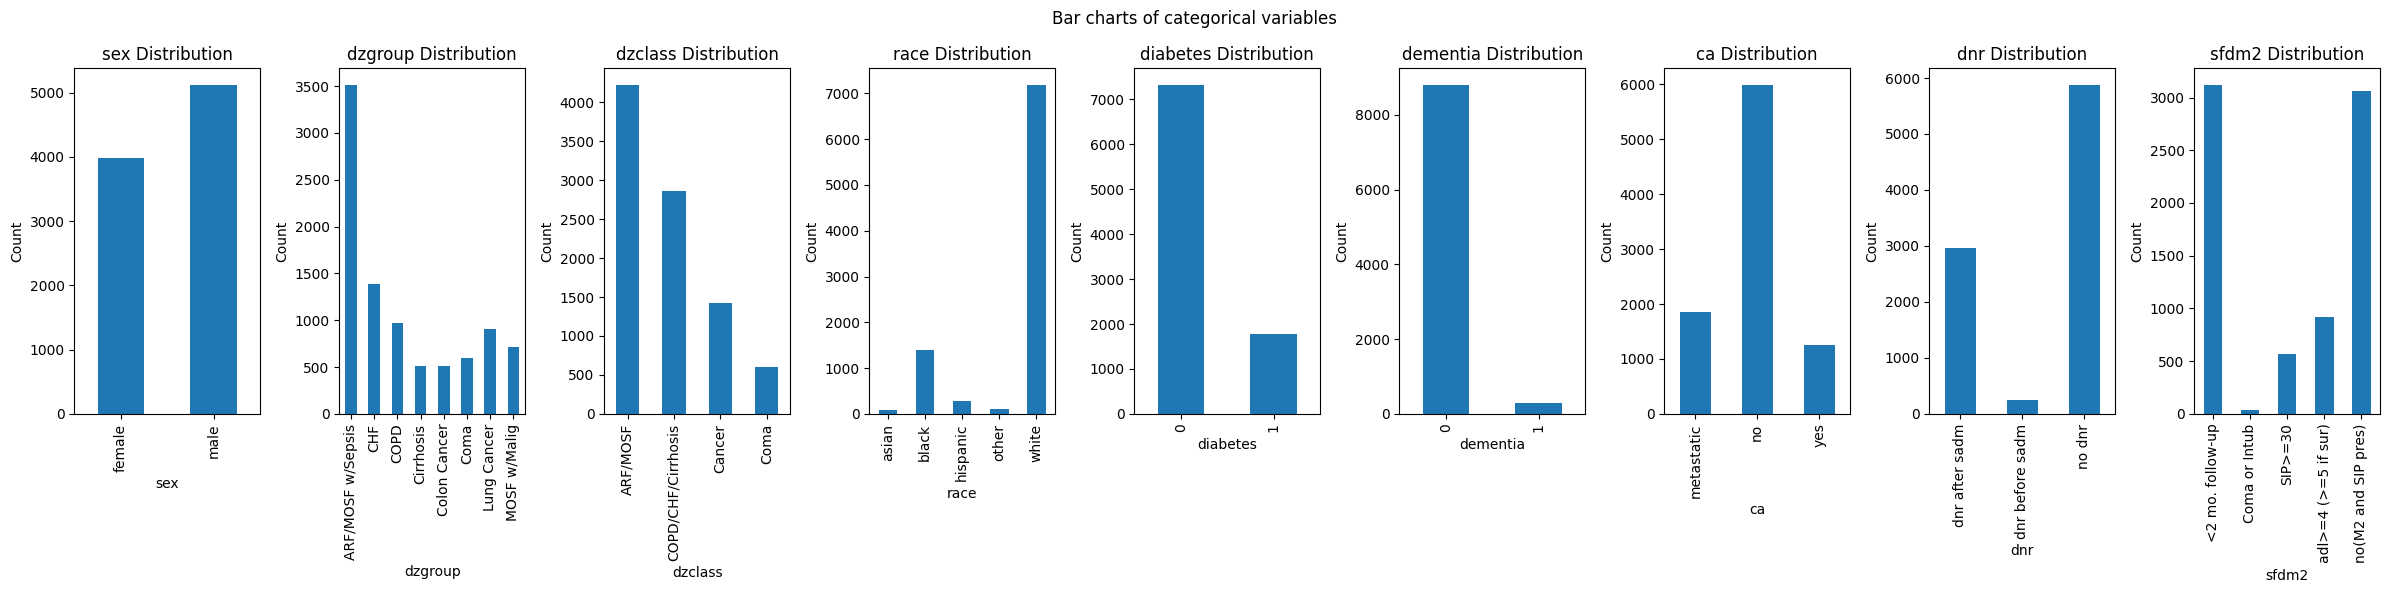

In [ ]:
# Plot categorical columns
PlotBarCharts(feature_DF, feature_cat_col)

In [ ]:
_ = feature_DF.pop('race')
# reject 'race' due to reason below                                      (and to not be racist)
# not removing here just noted

### **Catagorical data intepretation**


Sex (Selected) Slight skew towards males, no action needed.

Dzgroup (Selected, Doubt) Skewed towards "ARF/MOSF w/Sepsis". Consider grouping rare categories.

Dzclass (Selected, Doubt) Skewed towards "MOSF". Minor classes may need consolidation.

**Race (Rejected)** Highly Skewed towards "white", Most other race lack sample, least likely to impact mortality rate so it is rejected.

Diabetes (Selected) Skewed towards "no", acceptable as-is.

Dementia (Selected, Doubt) Highly imbalanced towards "no". but high potential impact.

Ca/Cancer (Selected) Slight skew towards "no", acceptable as-is.

DNR (Selected) Slight skewed towards "no DNR". acceptable as-is.

Sfdm2 (Selected) Some categories infrequent but usable as-is.



---

**Conclusion**
- Most variables are skewed to some extent, but they are relevant in a healthcare context. Variables like dzgroup, dzclass, sfdm2 and disease features may require further analysis to confirm their correlation with the target variable.


## 5.2 Visualize distribution of Continuous data

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'slos'}>,
        <Axes: title={'center': 'd.time'}>,
        <Axes: title={'center': 'num.co'}>,
        <Axes: title={'center': 'edu'}>],
       [<Axes: title={'center': 'scoma'}>,
        <Axes: title={'center': 'charges'}>,
        <Axes: title={'center': 'totcst'}>,
        <Axes: title={'center': 'avtisst'}>,
        <Axes: title={'center': 'sps'}>],
       [<Axes: title={'center': 'aps'}>,
        <Axes: title={'center': 'surv2m'}>,
        <Axes: title={'center': 'surv6m'}>,
        <Axes: title={'center': 'hday'}>,
        <Axes: title={'center': 'prg2m'}>],
       [<Axes: title={'center': 'prg6m'}>,
        <Axes: title={'center': 'dnrday'}>,
        <Axes: title={'center': 'meanbp'}>,
        <Axes: title={'center': 'wblc'}>,
        <Axes: title={'center': 'hrt'}>],
       [<Axes: title={'center': 'resp'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'pafi'}>,
        <Axe

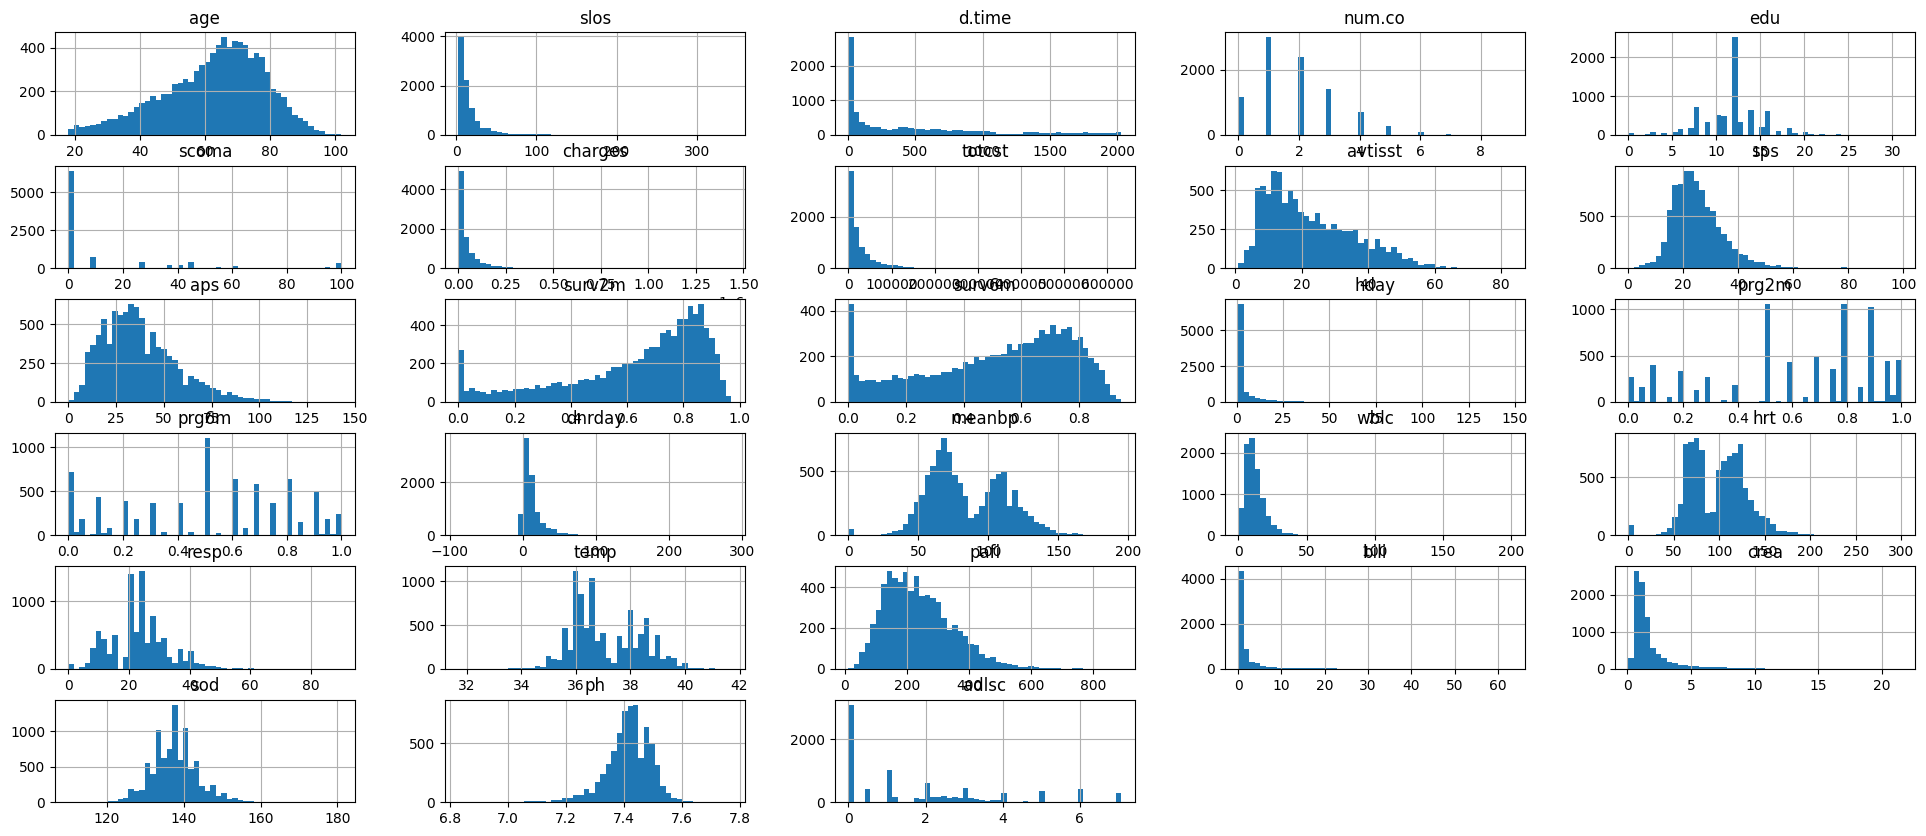

In [ ]:
# Plotting histograms of multiple columns together
feature_DF.hist(feature_con_col, figsize=(24, 10), bins=50)

Skewness :
- Random Distribution : scoma, prg2m, prg6m, adlsc, rejected
- Left/Right Skewed : slos, d.time, charges, totcst, artisst, sps, hday, dnrday, wblc, pafi, bili, crea
- Double bell shape : meanbp, hrt

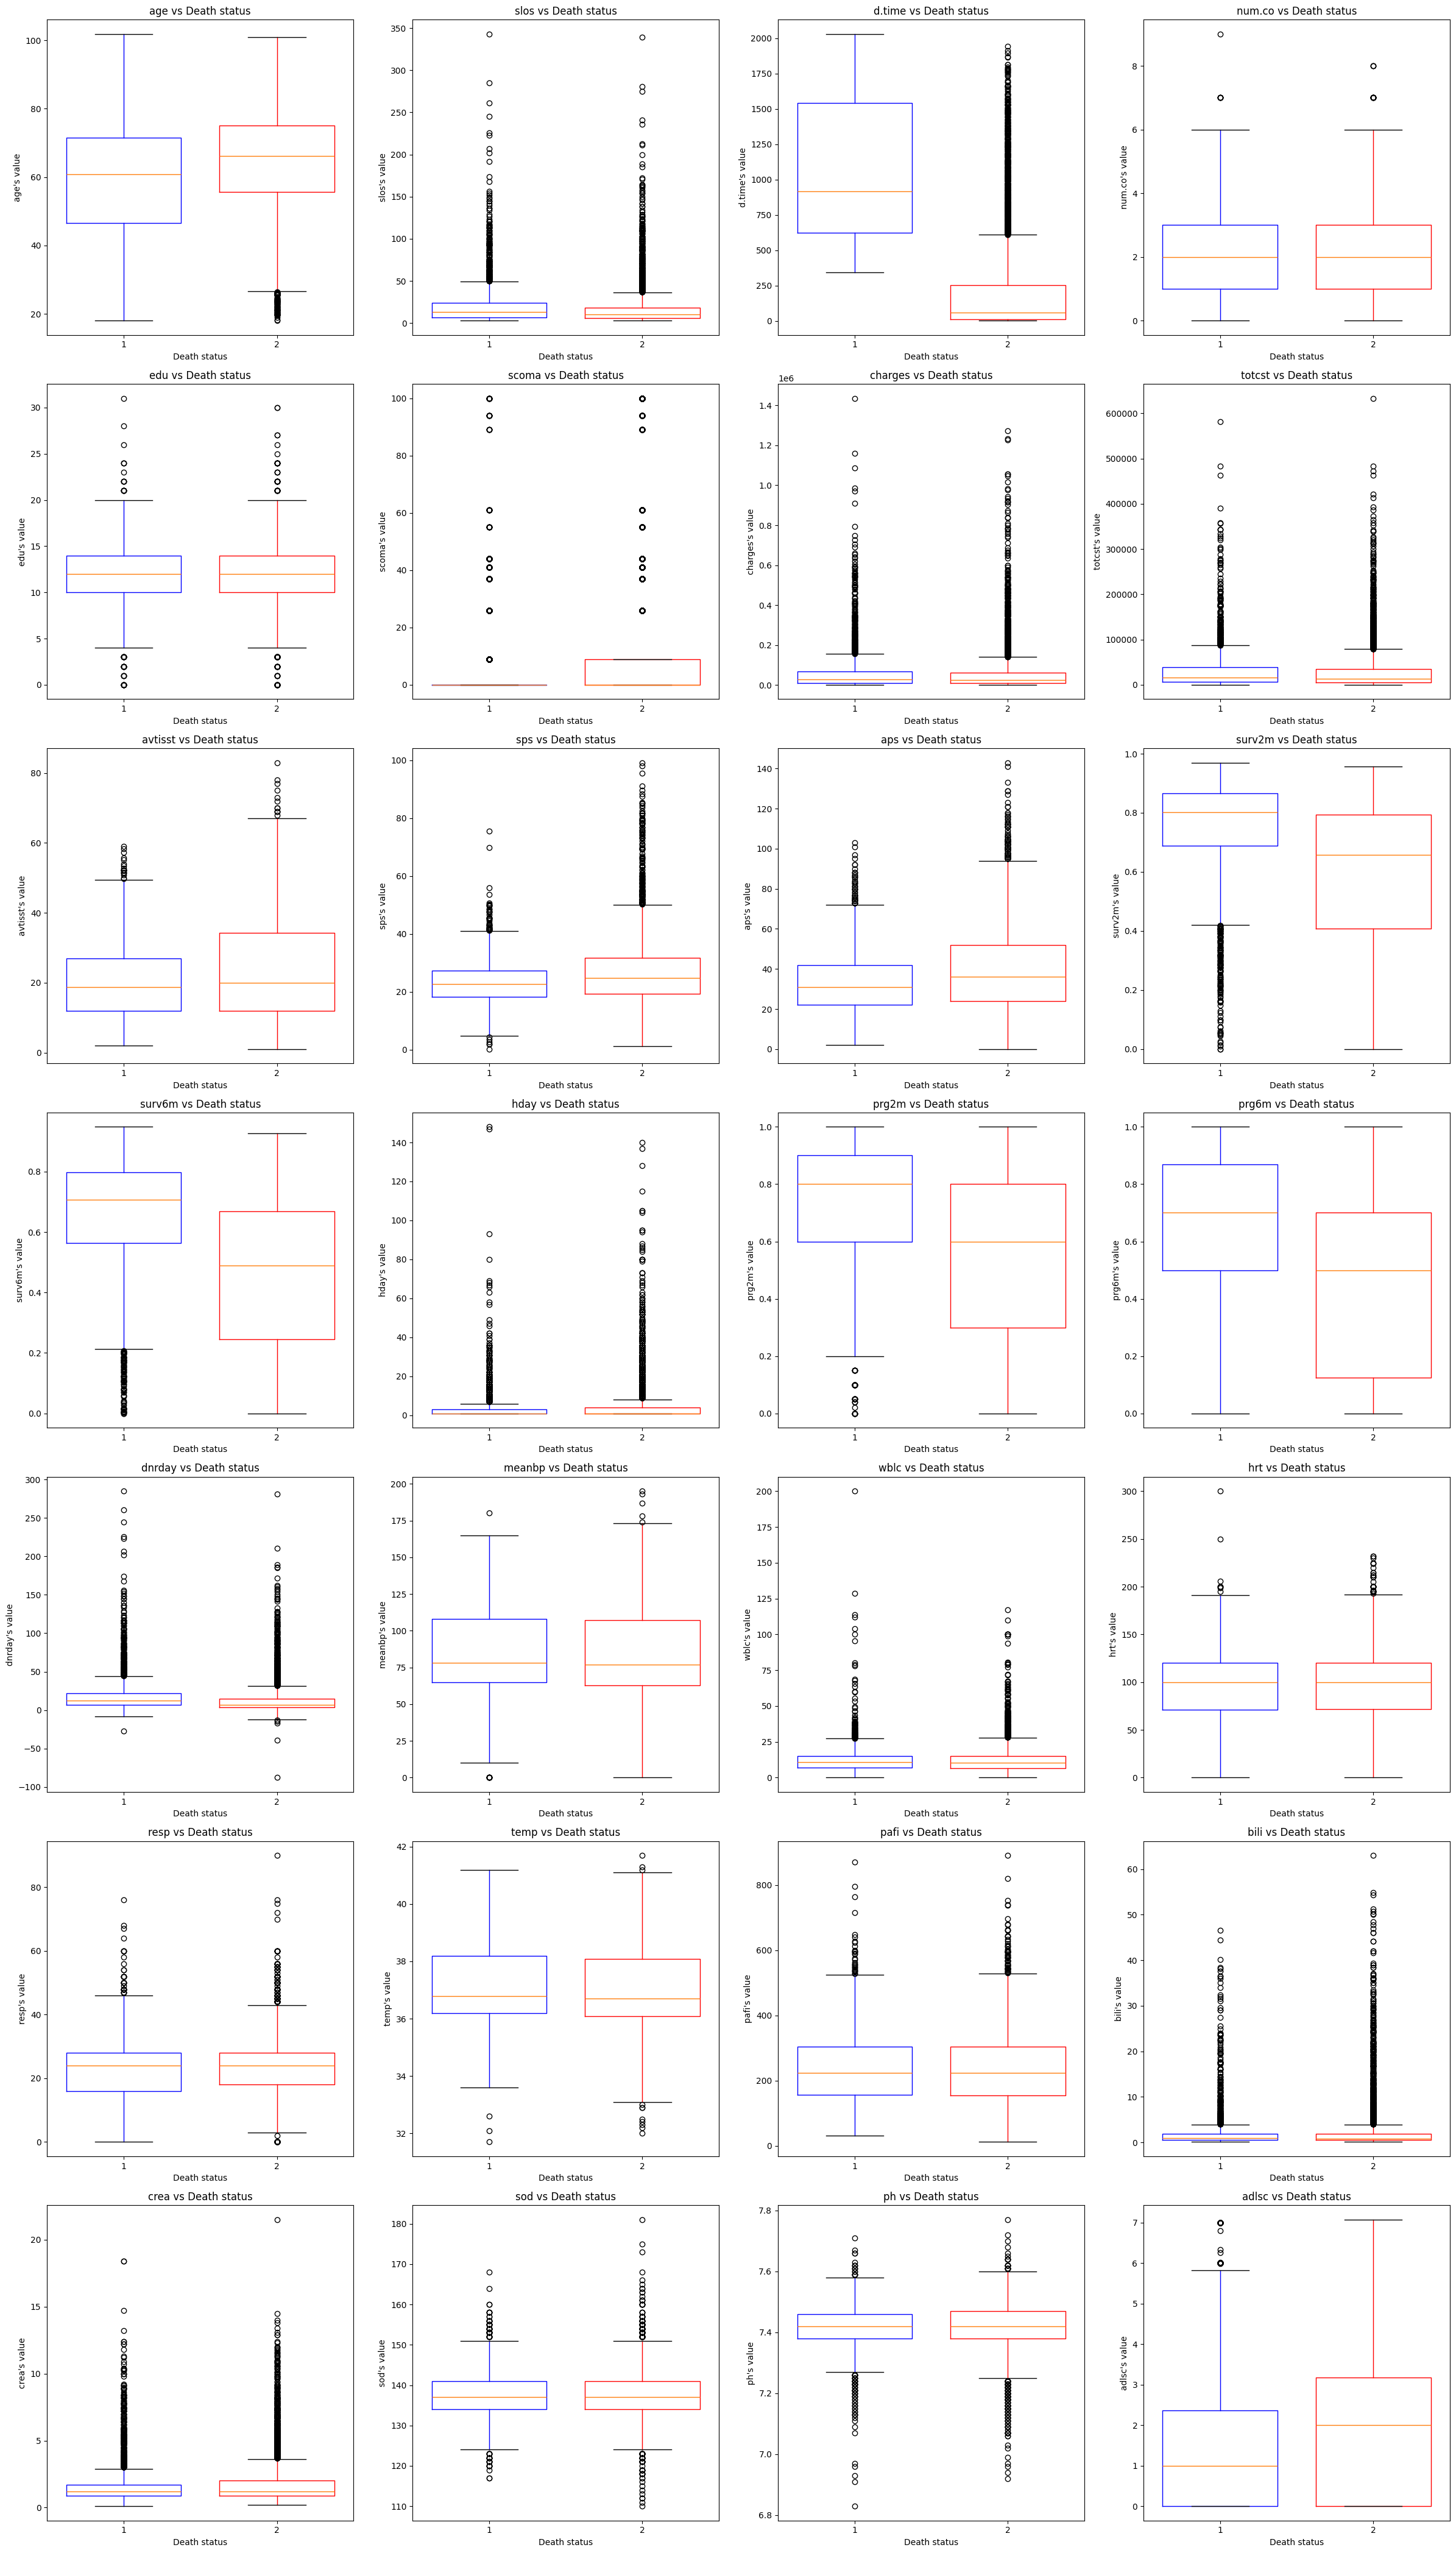

In [ ]:
# Plotting boxplot of multiple columns together to find distribution and outliers

# Calculate the required number of rows and columns for the subplot grid
num_features = len(feature_con_col)
num_cols = 4  # Number of columns in the grid
num_rows = math.ceil(num_features / num_cols)  # Calculate rows based on features

plt.figure(figsize=(24, num_rows * 6))  # Adjust figure size based on number of rows

# Separate True (death=1) and False (death=0) targets
target_is_T = target_DF.index[target_DF == True]
target_is_F = target_DF.index[target_DF == False]

# Iterate over continuous columns and create boxplots for each
for i, feature in enumerate(feature_con_col):
    plt.subplot(num_rows, num_cols, i + 1)

    plt.xlabel("Death status")
    plt.boxplot(feature_DF.loc[target_is_F.to_list(), feature].dropna(),
                positions=[1],
                widths=0.75,
                boxprops=dict(color='blue'),
                whiskerprops=dict(color='blue'))

    plt.boxplot(feature_DF.loc[target_is_T.to_list(), feature].dropna(),
                positions=[2],
                widths=0.75,
                boxprops=dict(color='red'),
                whiskerprops=dict(color='red'))

    plt.ylabel(f"{feature}'s value")
    plt.title(f"{feature} vs Death status")

# Show the plot
plt.tight_layout()
plt.show()

### **Boxplot Continuous Data Interpretation**  
- The ideal outcome in a boxplot is a **balanced distribution with minimal outliers**.  
- However, several features show **significant outliers and possible missing values**, suggesting the need for further data treatment.  
- No features are selected at this stage, as columns with outliers require **re-examination and potential transformations** for better modeling.

---

### Skewness
    Random Distribution : scoma, prg2m, prg6m, adlsc, rejected
    Left/Right Skewed : slos, d.time, charges, totcst, artisst, sps, hday, dnrday, wblc, pafi, bili, crea
    Double bell shape : meanbp, hrt

### **Continuous Variables that require actions**  

| **Feature**   | **Outlier Threshold / Cutoff**         | **Distribuition Suggest** |
|---------------|----------------------------------------|----------------------|
| **slos**      | Values > 175                          | Apply log transformation |
| **d.time**    | No extreme value              | Apply log transformation |
| **num.co**      | - | no action needed |
| **edu**       | Values > 15 or < 5                    | -|
| **scoma**      | - | Random distribution |
| **charges**   | Values > 0.8 million (log recommended) | Apply log transformation |
| **totcst**    | 500 > Values > 400k (log recommended)       | Apply log transformation |
| **avtisst**   | Values > 65 (log recommended)         | Apply log transformation |
| **sps**       | Values > 65                           | acceptable |
| **aps**       | Values > 120                          | acceptable |
| **hday**      | Values > 100 (log recommended)        | Apply log transformation |
| **dnrday**    | Values > 125 or < -15                 | Investigate anomalies |
| **resp**      | Values > 60                           | acceptable |
| **bili**      | Values > 28 (log recommended)         | Apply log transformation |

---

These action and value may or may not work, it is simply a guideline for next step and could be changed.


Value here are excluded from the table as they either require no treatment or need further examination
- **Already well distributed/No outlier :** ['num.co', 'edu', 'surv2m', 'surv6m', 'meanbp', 'hrt', 'temp', 'pafi', 'sod', 'ph']
- **Highly skewed require re-examine :** ['wblc', 'crea']
- **Randomly distributed :** ['scoma', 'prg2m', 'prg6m', 'adlsc'] -> Rejected



In [ ]:
# Removing Rejected featres
_ = feature_DF.pop("scoma")
_ = feature_DF.pop("prg2m")
_ = feature_DF.pop("prg6m")
_ = feature_DF.pop("adlsc")

# 6.Outlier and Skewness treatment

## Note :
- We are proceeding with transformation right from this  6. as we already analyzed data in step 5. with Identified distribution, outlier and skewness.
- There will be another analysis on step 8. after data transformation only to see the different and finally select the feature based on transformed data.




For Continuous datas, outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

In this case, multiple value has Outlier and Skewness as listed on the previous step.

**Steps for Treatment** :
During Outlier and Skewness treatment we clean each feature one by one following this step
1. Clip out outlier
2. if skew, try log transform
3. if still skew, try sqrt transform
4. if still skew, try cbrt transform

- if none worked, the feature is likely to be dropped
- if original is better, We keep the original

In [ ]:

temp_feature_DF = feature_DF.copy()
clean_feature_DF = feature_DF


3
343
1.3862943611198906
5.170483995038151


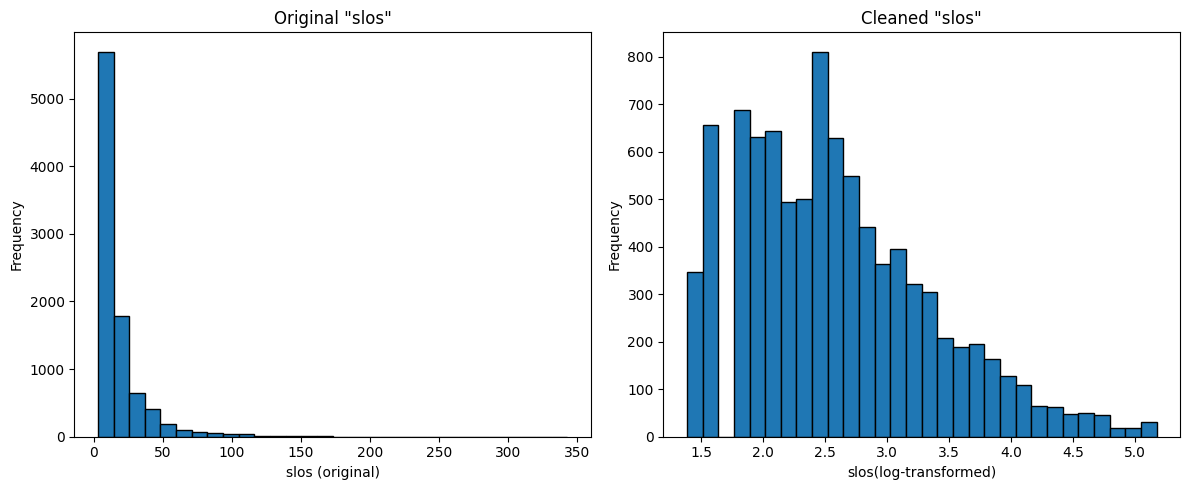

In [ ]:


selected_feature = 'slos'

print(clean_feature_DF[selected_feature].min())
print(clean_feature_DF[selected_feature].max())

clean_feature_DF[selected_feature] = np.log1p(np.clip(clean_feature_DF[selected_feature], a_min = None, a_max = 175))

print(clean_feature_DF[selected_feature].min())
print(clean_feature_DF[selected_feature].max())

# Plot before and after transformations
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original data
axes[0].hist(temp_feature_DF[selected_feature], bins=30, edgecolor='k')
axes[0].set(xlabel=f'{selected_feature} (original)', ylabel='Frequency', title=f'Original "{selected_feature}"')

# Transformed data
axes[1].hist(clean_feature_DF[selected_feature], bins=30, edgecolor='k')
axes[1].set(xlabel=f'{selected_feature}(log-transformed)', ylabel='Frequency', title=f'Cleaned "{selected_feature}"')

plt.tight_layout()
plt.show()

3
2029


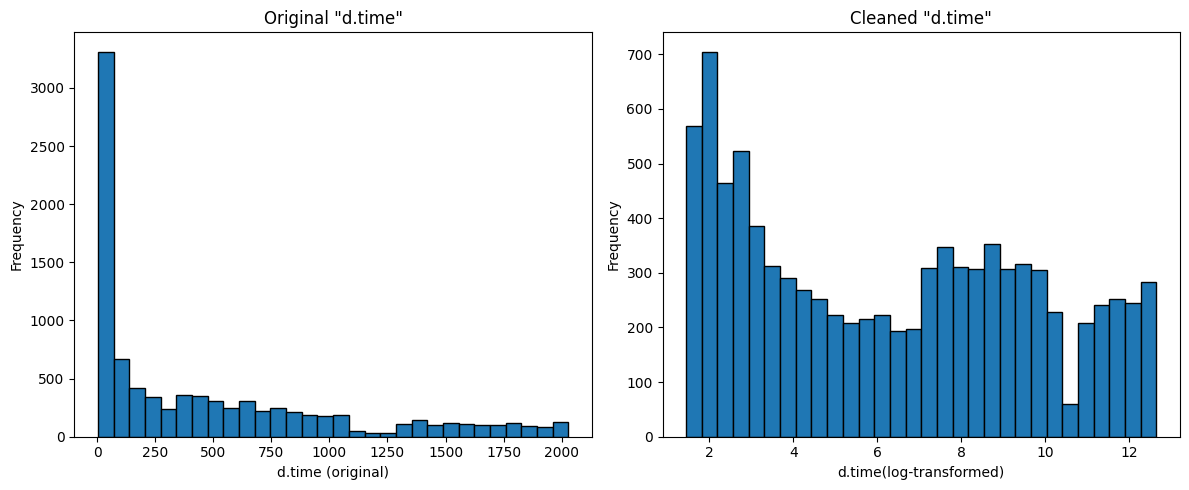

In [ ]:
selected_feature = 'd.time'

print(clean_feature_DF[selected_feature].min())
print(clean_feature_DF[selected_feature].max())
clean_feature_DF[selected_feature] = np.cbrt(clean_feature_DF[selected_feature])


# Plot before and after transformations
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original data
axes[0].hist(temp_feature_DF[selected_feature], bins=30, edgecolor='k')
axes[0].set(xlabel=f'{selected_feature} (original)', ylabel='Frequency', title=f'Original "{selected_feature}"')

# Transformed data
axes[1].hist(clean_feature_DF[selected_feature], bins=30, edgecolor='k')
axes[1].set(xlabel=f'{selected_feature}(log-transformed)', ylabel='Frequency', title=f'Cleaned "{selected_feature}"')

plt.tight_layout()
plt.show()
# log transform doesn't work so I used C-Root instead

In [ ]:
selected_feature = 'num.co'

1169.0
1435423.0


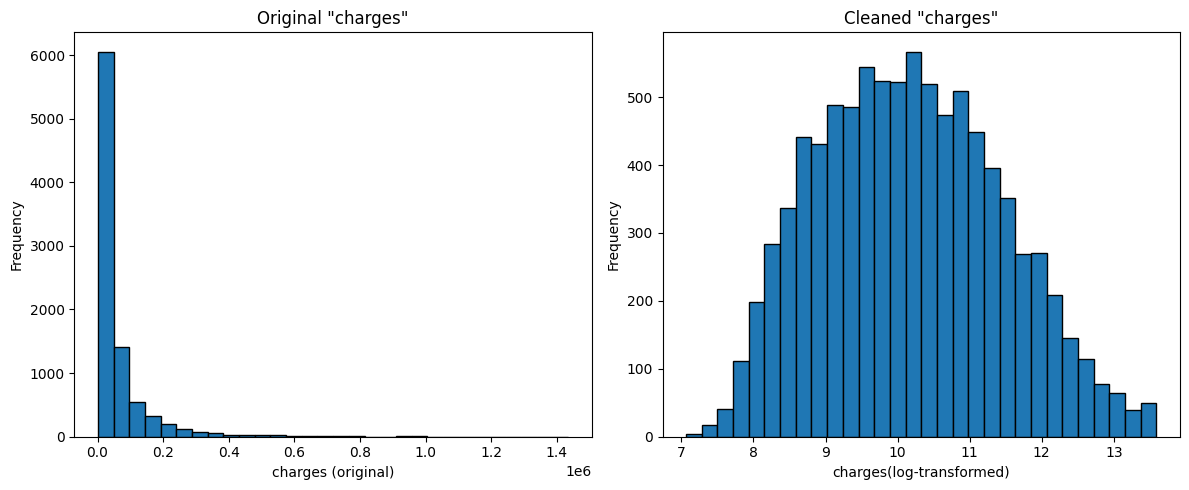

In [ ]:
selected_feature = 'charges'

print(clean_feature_DF[selected_feature].min())
print(clean_feature_DF[selected_feature].max())
clean_feature_DF[selected_feature] = np.log1p(np.clip(clean_feature_DF[selected_feature], a_min = None, a_max = 0.8e6))


# Plot before and after transformations
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original data
axes[0].hist(temp_feature_DF[selected_feature], bins=30, edgecolor='k')
axes[0].set(xlabel=f'{selected_feature} (original)', ylabel='Frequency', title=f'Original "{selected_feature}"')

# Transformed data
axes[1].hist(clean_feature_DF[selected_feature], bins=30, edgecolor='k')
axes[1].set(xlabel=f'{selected_feature}(log-transformed)', ylabel='Frequency', title=f'Cleaned "{selected_feature}"')

plt.tight_layout()
plt.show()
# great result after log

0.0
633212.0


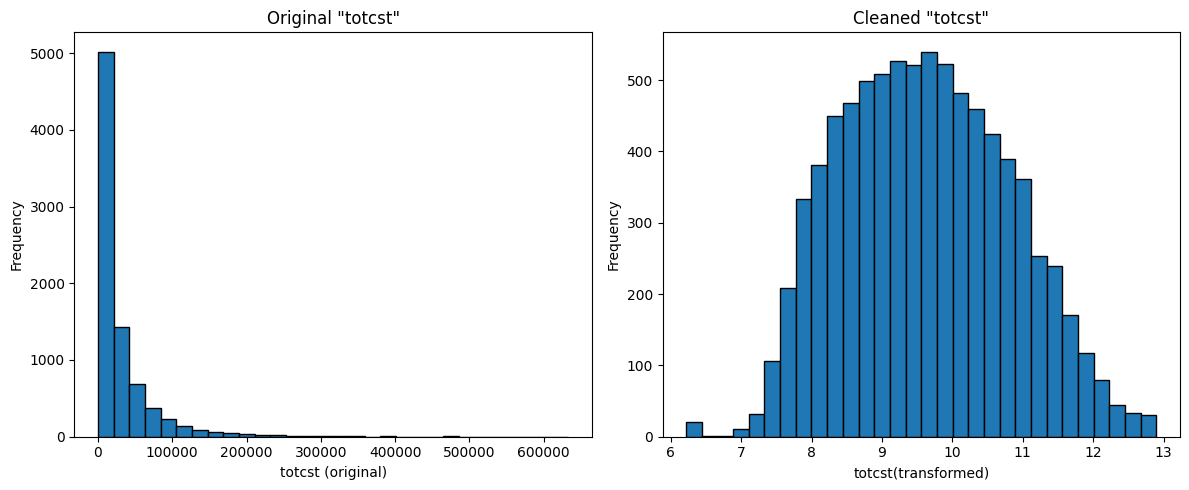

In [ ]:
selected_feature = 'totcst'

print(clean_feature_DF[selected_feature].min())
print(clean_feature_DF[selected_feature].max())
clean_feature_DF[selected_feature] = np.log1p(np.clip(clean_feature_DF[selected_feature], a_min = 500, a_max = 0.4e6))
# Plot before and after transformations
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original data
axes[0].hist(temp_feature_DF[selected_feature], bins=30, edgecolor='k')
axes[0].set(xlabel=f'{selected_feature} (original)', ylabel='Frequency', title=f'Original "{selected_feature}"')

# Transformed data
axes[1].hist(clean_feature_DF[selected_feature], bins=30, edgecolor='k')
axes[1].set(xlabel=f'{selected_feature}(transformed)', ylabel='Frequency', title=f'Cleaned "{selected_feature}"')

plt.tight_layout()
plt.show()

# good result after log, clip at 500 > x > 400k

1.0
83.0


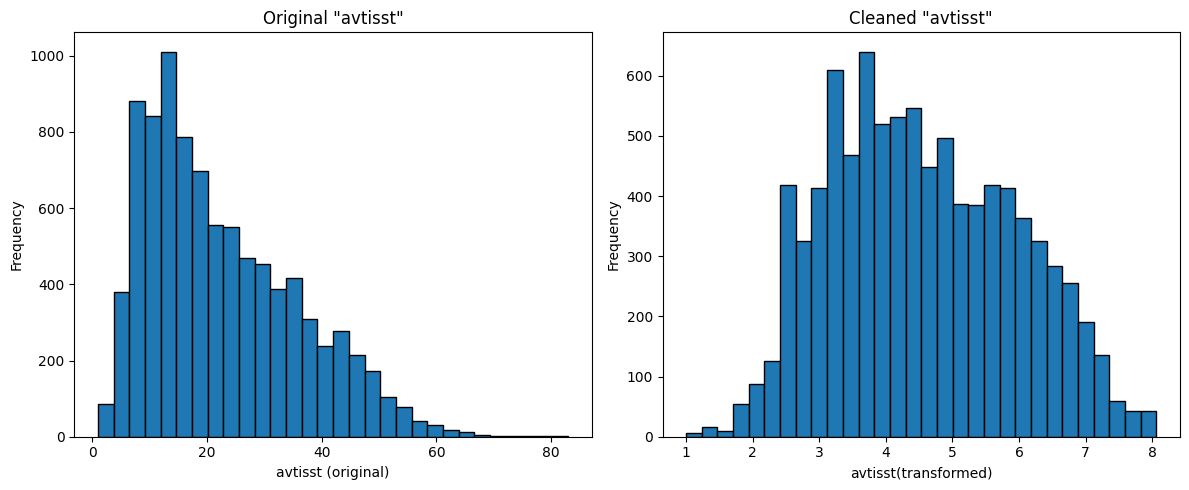

In [ ]:
selected_feature = 'avtisst'

print(clean_feature_DF[selected_feature].min())
print(clean_feature_DF[selected_feature].max())
clean_feature_DF[selected_feature] = np.sqrt(np.clip(clean_feature_DF[selected_feature], a_min = None, a_max = 65))
# Plot before and after transformations
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original data
axes[0].hist(temp_feature_DF[selected_feature], bins=30, edgecolor='k')
axes[0].set(xlabel=f'{selected_feature} (original)', ylabel='Frequency', title=f'Original "{selected_feature}"')

# Transformed data
axes[1].hist(clean_feature_DF[selected_feature], bins=30, edgecolor='k')
axes[1].set(xlabel=f'{selected_feature}(transformed)', ylabel='Frequency', title=f'Cleaned "{selected_feature}"')

plt.tight_layout()
plt.show()

#clip and apply square-root instead of log

0.1999817
99.1875


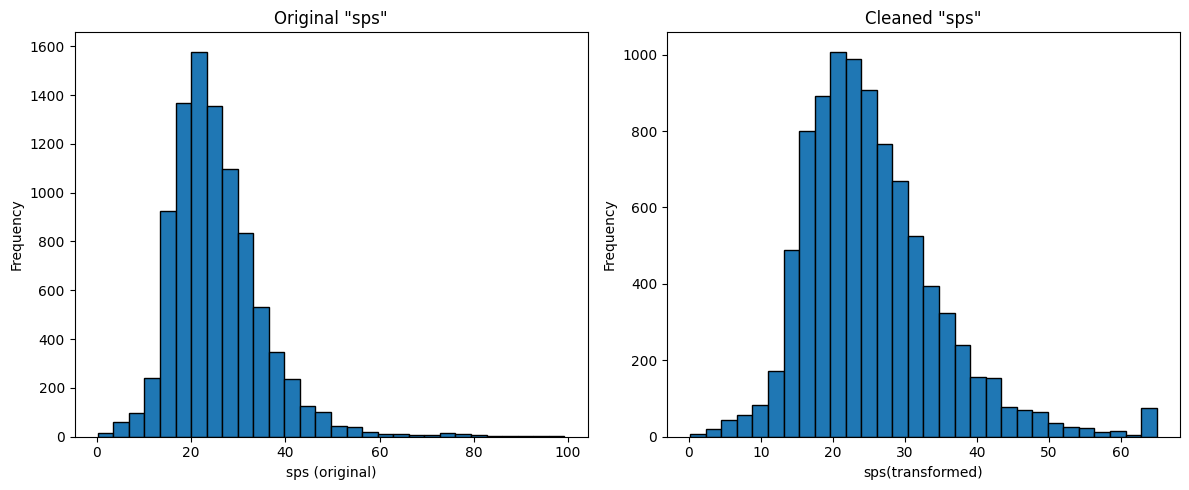

In [ ]:

selected_feature = 'sps'

print(clean_feature_DF[selected_feature].min())
print(clean_feature_DF[selected_feature].max())
clean_feature_DF[selected_feature] = np.clip(clean_feature_DF[selected_feature], a_min = None, a_max = 65)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original data
axes[0].hist(temp_feature_DF[selected_feature], bins=30, edgecolor='k')
axes[0].set(xlabel=f'{selected_feature} (original)', ylabel='Frequency', title=f'Original "{selected_feature}"')

# Transformed data
axes[1].hist(clean_feature_DF[selected_feature], bins=30, edgecolor='k')
axes[1].set(xlabel=f'{selected_feature}(transformed)', ylabel='Frequency', title=f'Cleaned "{selected_feature}"')

plt.tight_layout()
plt.show()

#only clipping done

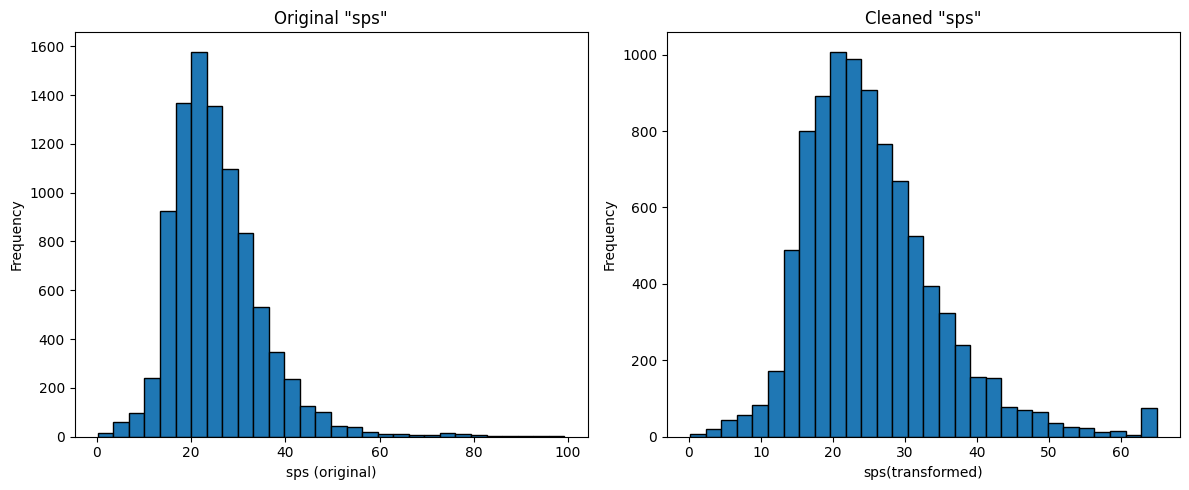

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original data
axes[0].hist(temp_feature_DF[selected_feature], bins=30, edgecolor='k')
axes[0].set(xlabel=f'{selected_feature} (original)', ylabel='Frequency', title=f'Original "{selected_feature}"')

# Transformed data
axes[1].hist(clean_feature_DF[selected_feature], bins=30, edgecolor='k')
axes[1].set(xlabel=f'{selected_feature}(transformed)', ylabel='Frequency', title=f'Cleaned "{selected_feature}"')

plt.tight_layout()
plt.show()

0.0
143.0


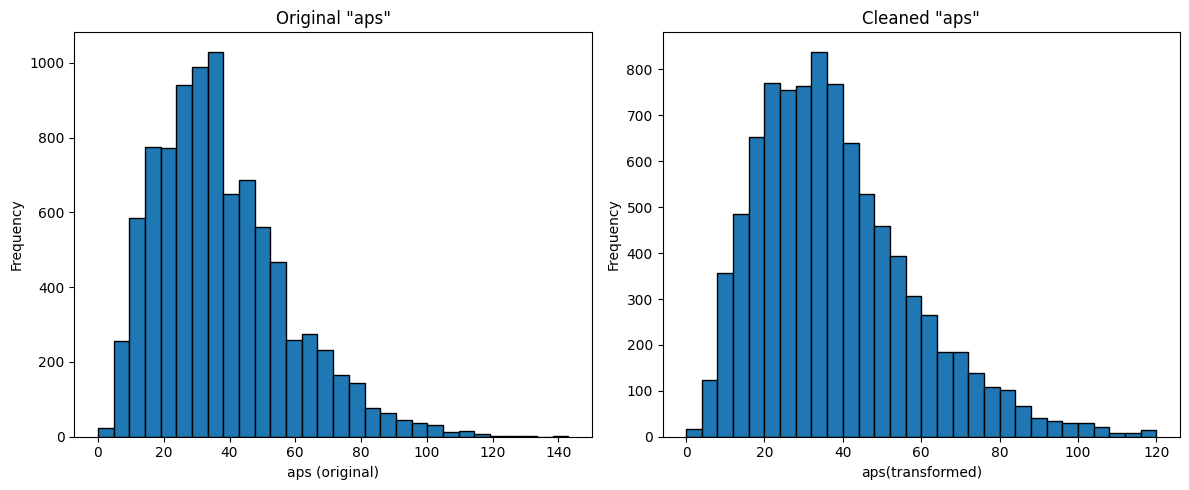

In [ ]:
selected_feature = 'aps'

print(clean_feature_DF[selected_feature].min())
print(clean_feature_DF[selected_feature].max())
clean_feature_DF[selected_feature] = np.clip(clean_feature_DF[selected_feature], a_min = None, a_max = 120)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original data
axes[0].hist(temp_feature_DF[selected_feature], bins=30, edgecolor='k')
axes[0].set(xlabel=f'{selected_feature} (original)', ylabel='Frequency', title=f'Original "{selected_feature}"')

# Transformed data
axes[1].hist(clean_feature_DF[selected_feature], bins=30, edgecolor='k')
axes[1].set(xlabel=f'{selected_feature}(transformed)', ylabel='Frequency', title=f'Cleaned "{selected_feature}"')

plt.tight_layout()
plt.show()

#only clipping done

1
148


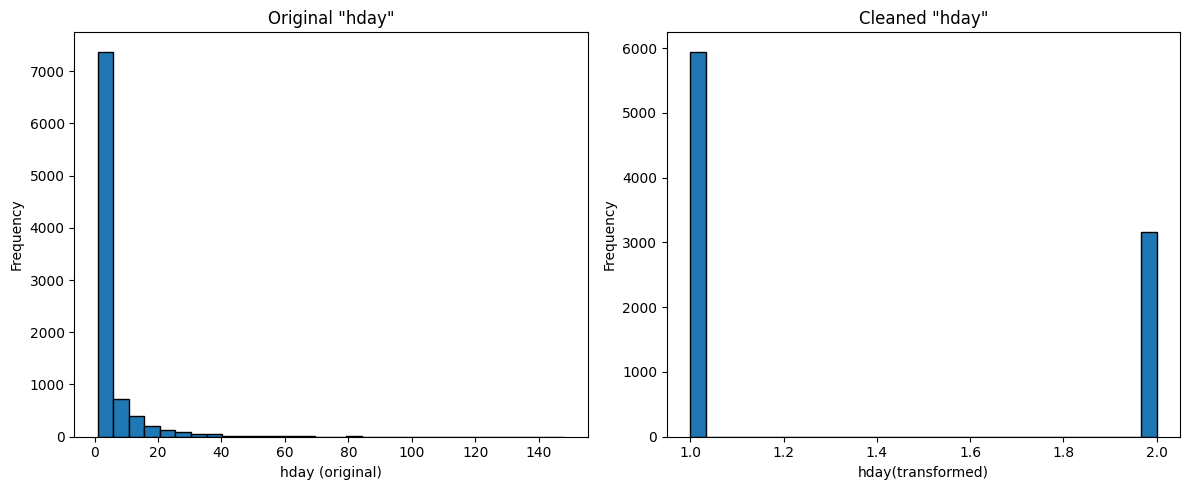

In [ ]:
selected_feature = 'hday'

print(clean_feature_DF[selected_feature].min())
print(clean_feature_DF[selected_feature].max())
clean_feature_DF[selected_feature] = (np.clip(clean_feature_DF[selected_feature], a_min = 1, a_max = 2))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original data
axes[0].hist(temp_feature_DF[selected_feature], bins=30, edgecolor='k')
axes[0].set(xlabel=f'{selected_feature} (original)', ylabel='Frequency', title=f'Original "{selected_feature}"')

# Transformed data
axes[1].hist(clean_feature_DF[selected_feature], bins=30, edgecolor='k')
axes[1].set(xlabel=f'{selected_feature}(transformed)', ylabel='Frequency', title=f'Cleaned "{selected_feature}"')

plt.tight_layout()
plt.show()

# clip 1 and 2 just to show different, We've tried other transformation but none workked

For 'hday' as plotted, there too many sample with value '1' more than any other value combined, which is why no transformation worked. As of now we are have considered **dropping** this feature which may harm the model's result.

-88.0
285.0


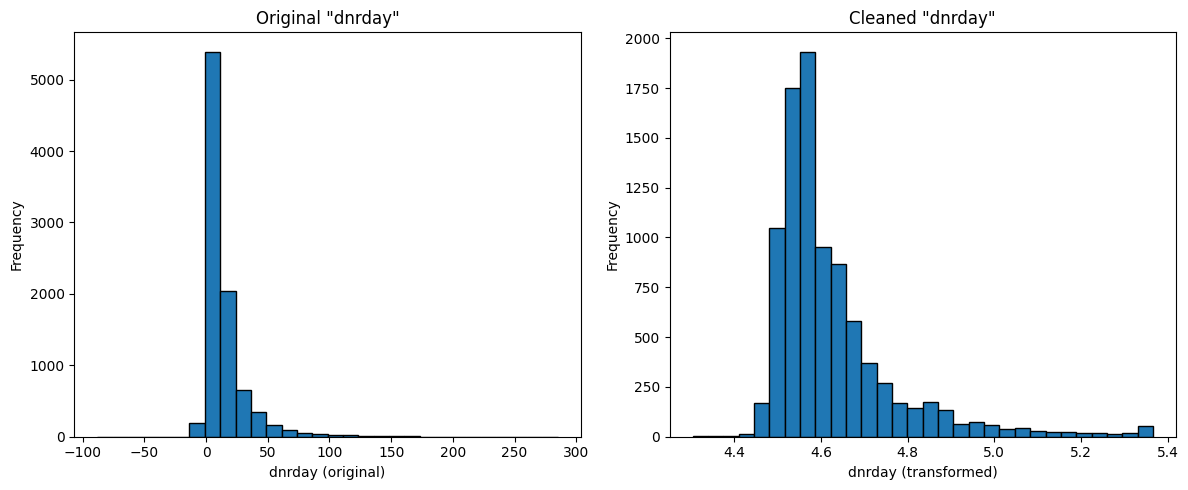

In [ ]:
selected_feature = 'dnrday'

print(clean_feature_DF[selected_feature].min())
print(clean_feature_DF[selected_feature].max())

# Clip, shift, and apply transformation
shift_value = abs(clean_feature_DF[selected_feature].min())
clean_feature_DF[selected_feature] = np.log1p(np.clip(clean_feature_DF[selected_feature], -15, 125) + shift_value)

# Plot original and transformed data
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].hist(temp_feature_DF[selected_feature], bins=30, edgecolor='k')
axes[0].set(xlabel=f'{selected_feature} (original)', ylabel='Frequency', title=f'Original "{selected_feature}"')

axes[1].hist(clean_feature_DF[selected_feature], bins=30, edgecolor='k')
axes[1].set(xlabel=f'{selected_feature} (transformed)', ylabel='Frequency', title=f'Cleaned "{selected_feature}"')

plt.tight_layout()
plt.show()

# Clip, shift, and apply transformation, only slightly better

0.0
90.0


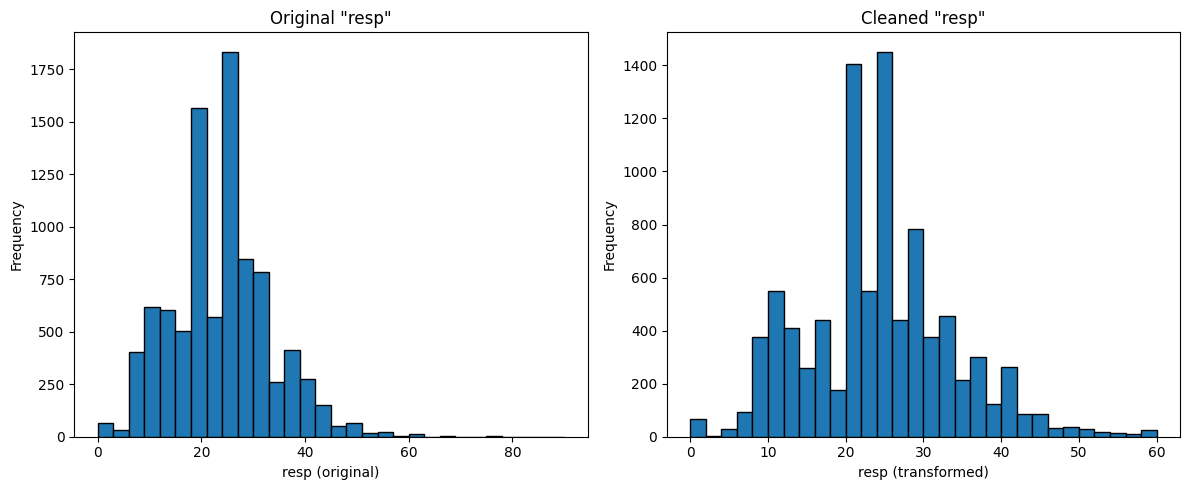

In [ ]:
selected_feature = 'resp'

print(clean_feature_DF[selected_feature].min())
print(clean_feature_DF[selected_feature].max())
clean_feature_DF[selected_feature] = np.clip(clean_feature_DF[selected_feature], a_min = None, a_max = 60)

# Plot original and transformed data
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].hist(temp_feature_DF[selected_feature], bins=30, edgecolor='k')
axes[0].set(xlabel=f'{selected_feature} (original)', ylabel='Frequency', title=f'Original "{selected_feature}"')

axes[1].hist(clean_feature_DF[selected_feature], bins=30, edgecolor='k')
axes[1].set(xlabel=f'{selected_feature} (transformed)', ylabel='Frequency', title=f'Cleaned "{selected_feature}"')

plt.tight_layout()
plt.show()

# only clip enough

0.09999084
63.0


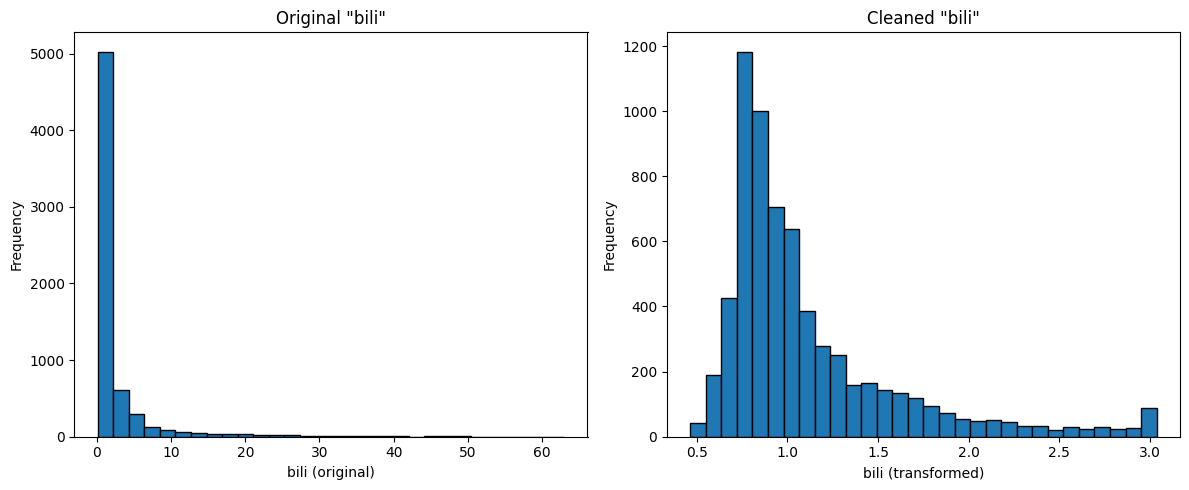

In [ ]:
selected_feature = 'bili'

print(clean_feature_DF[selected_feature].min())
print(clean_feature_DF[selected_feature].max())
clean_feature_DF[selected_feature] = np.cbrt(np.clip(clean_feature_DF[selected_feature], a_min = None, a_max = 28))

# Plot original and transformed data
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].hist(temp_feature_DF[selected_feature], bins=30, edgecolor='k')
axes[0].set(xlabel=f'{selected_feature} (original)', ylabel='Frequency', title=f'Original "{selected_feature}"')

axes[1].hist(clean_feature_DF[selected_feature], bins=30, edgecolor='k')
axes[1].set(xlabel=f'{selected_feature} (transformed)', ylabel='Frequency', title=f'Cleaned "{selected_feature}"')

plt.tight_layout()
plt.show()

# clipped and cbrt transformed

0.0
200.0


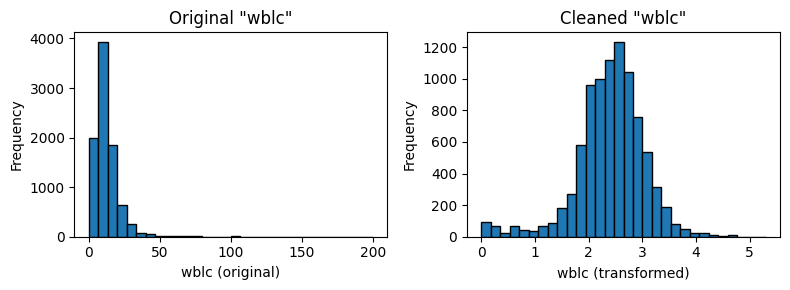

0.09999084
21.5


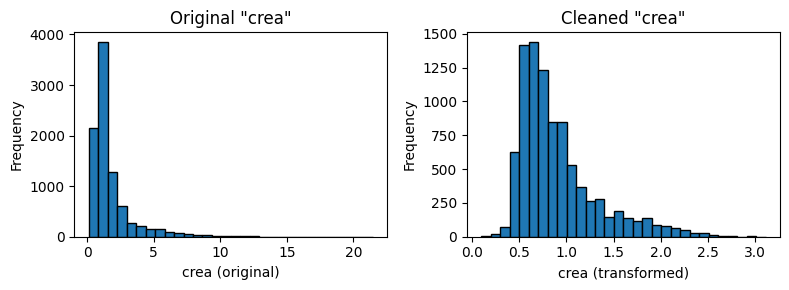

In [ ]:
selected_features = ['wblc', 'crea']

for selected_feature in selected_features:
  print(clean_feature_DF[selected_feature].min())
  print(clean_feature_DF[selected_feature].max())
  clean_feature_DF[selected_feature] = np.log1p(clean_feature_DF[selected_feature])

  # Plot original and transformed data
  fig, axes = plt.subplots(1, 2, figsize=(8, 3))
  axes[0].hist(temp_feature_DF[selected_feature], bins=30, edgecolor='k')
  axes[0].set(xlabel=f'{selected_feature} (original)', ylabel='Frequency', title=f'Original "{selected_feature}"')

  axes[1].hist(clean_feature_DF[selected_feature], bins=30, edgecolor='k')
  axes[1].set(xlabel=f'{selected_feature} (transformed)', ylabel='Frequency', title=f'Cleaned "{selected_feature}"')

  plt.tight_layout()
  plt.show()


As plotted after log transformation
'wblc' and 'crea' turn out to have better distribution although skewness remains for 'crea'

## Outlier/Skew treatment summary

1. **Usable Continuous features**
- well distributed/low skew after treatment : ['edu', 'charges', 'totcst', 'avtisst', 'sps', 'aps', 'resp', 'bili', 'wblc']
- treatment skipped : ['num.co', 'surv2m', 'surv6m', 'meanbp', 'hrt', 'temp', 'pafi', 'sod', 'ph']
- skewness remaining : ['slos', 'd.time', 'dnrday', 'crea']
2. **Dropped Feature**
- Dropped : 'hday' due to majority of sample being the same number

In [ ]:
# Removing 'hday' from final feature
_ = clean_feature_DF.pop("hday")

# 7.Missing value treatment
- เติมค่า median ให้กับ row ที่มี missing value

From step 4.2 Data Exploration , remaining feaeture with missing value are

- Continuous : ['bili', 'pafi', 'ph', 'prg2m', 'edu', 'prg6m', 'totcst', 'wblc', 'charges', 'avtisst', 'crea', 'dnrday']

- Catagorical : ['dnr', 'sfdm2]

Since most feature are well distributed after treatment,
- Impute the missing values with MEDIAN value for continuous variables
- Impute the missing values with MODE value for categorical variables

In [ ]:
selected_feature = ['bili', 'pafi', 'ph', 'edu', 'sfdm2', 'totcst', 'wblc', 'charges', 'avtisst', 'crea', 'dnr', 'dnrday']

nan_count = clean_feature_DF[selected_feature].isna().sum().to_list()
nan_count = zip(selected_feature, nan_count)

# แยกเอาเฉพาะ Column ที่มี Nan
nan_count = [c for c in nan_count if c[1] != 0]

# คำนวณจำนวน Nan เป็นเปอร์เซ็นต์เทียบกับ List ทั้งหมด
nan_count = [(c[0], c[1], "{:.2f} %".format(c[1] * 100 / clean_feature_DF.shape[0])) for c in nan_count]
sorted(nan_count, key=lambda x: x[1], reverse=True)

[('bili', 2599, '28.55 %'),
 ('pafi', 2323, '25.52 %'),
 ('ph', 2282, '25.07 %'),
 ('edu', 1634, '17.95 %'),
 ('sfdm2', 1400, '15.38 %'),
 ('totcst', 886, '9.73 %'),
 ('wblc', 211, '2.32 %'),
 ('charges', 171, '1.88 %'),
 ('avtisst', 81, '0.89 %'),
 ('crea', 66, '0.73 %'),
 ('dnr', 29, '0.32 %'),
 ('dnrday', 29, '0.32 %')]

In [ ]:
# List of features with missing values
con_with_missing = ['bili', 'pafi', 'ph', 'edu', 'totcst', 'wblc', 'charges', 'avtisst', 'crea', 'dnrday']
cat_with_missing = ['dnr', 'sfdm2']

# Fill missing values with the median for each feature
for feature in con_with_missing:
    feature_median = clean_feature_DF[feature].median()  # Calculate median
    clean_feature_DF[feature].fillna(feature_median, inplace=True)  # Fill missing values

for feature in cat_with_missing:
    mode_value = feature_DF[feature].mode()[0]  # Calculate the mode (most frequent value)
    clean_feature_DF[feature].fillna(mode_value, inplace=True)  # Fill missing values

print(clean_feature_DF.isnull().sum())
# Make sure there is no more missing value

age         0
sex         0
slos        0
d.time      0
dzgroup     0
dzclass     0
num.co      0
edu         0
charges     0
totcst      0
avtisst     0
sps         0
aps         0
surv2m      0
surv6m      0
diabetes    0
dementia    0
ca          0
dnr         0
dnrday      0
meanbp      0
wblc        0
hrt         0
resp        0
temp        0
pafi        0
bili        0
crea        0
sod         0
ph          0
sfdm2       0
dtype: int64


<ipython-input-419-9362e17f15ad>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_feature_DF[feature].fillna(feature_median, inplace=True)  # Fill missing values
<ipython-input-419-9362e17f15ad>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

# 8.Visual correlation analysis and Statistical measurement (Analysis 2)

Visual exploration of relationship between variables
- Continuous Vs Continuous ---- Scatter Plot
- Categorical Vs Continuous---- Box Plot
- Categorical Vs Categorical---- Grouped Bar Plots or Stacked Bar Plot

Statistical measurement of relationship strength between variables
- Continuous Vs Continuous ---- Correlation matrix
- Categorical Vs Continuous---- ANOVA test
- Categorical Vs Categorical--- Chi-Square test or Mutual information

In this case study the Target variable is Catagorical, hence below two scenarios will be present

- Categorical Target Variable Vs Continuous Predictor ---- Box Plot (visual) ->  ANOVA test (statistic)
- Categorical Target Variable Vs Categorical Predictor ---- Grouped Bar Plots or Stacked Bar Plot (visual) ->  Chi-square test or Mutual information (statistic)


## 8.1 Continuous feauture (vs Categorical target)

In [ ]:
# column updates
print(feature_cat_col)
print(feature_con_col)
for i in feature_cat_col:
  if i not in clean_feature_DF:
    feature_cat_col.remove(i)
for j in feature_con_col:
  if j not in clean_feature_DF:
    feature_con_col.remove(j)
print(feature_cat_col)
print(feature_con_col)

# repeating since first time wasn't enough
for i in feature_cat_col:
  if i not in clean_feature_DF:
    feature_cat_col.remove(i)
for j in feature_con_col:
  if j not in clean_feature_DF:
    feature_con_col.remove(j)
print(feature_cat_col)
print(feature_con_col)

['sex', 'dzgroup', 'dzclass', 'race', 'diabetes', 'dementia', 'ca', 'dnr', 'sfdm2']
['age', 'slos', 'd.time', 'num.co', 'edu', 'scoma', 'charges', 'totcst', 'avtisst', 'sps', 'aps', 'surv2m', 'surv6m', 'hday', 'prg2m', 'prg6m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'bili', 'crea', 'sod', 'ph', 'adlsc']
['sex', 'dzgroup', 'dzclass', 'diabetes', 'dementia', 'ca', 'dnr', 'sfdm2']
['age', 'slos', 'd.time', 'num.co', 'edu', 'charges', 'totcst', 'avtisst', 'sps', 'aps', 'surv2m', 'surv6m', 'prg2m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'bili', 'crea', 'sod', 'ph']
['sex', 'dzgroup', 'dzclass', 'diabetes', 'dementia', 'ca', 'dnr', 'sfdm2']
['age', 'slos', 'd.time', 'num.co', 'edu', 'charges', 'totcst', 'avtisst', 'sps', 'aps', 'surv2m', 'surv6m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'bili', 'crea', 'sod', 'ph']


### 8.1.1 Visual correlation

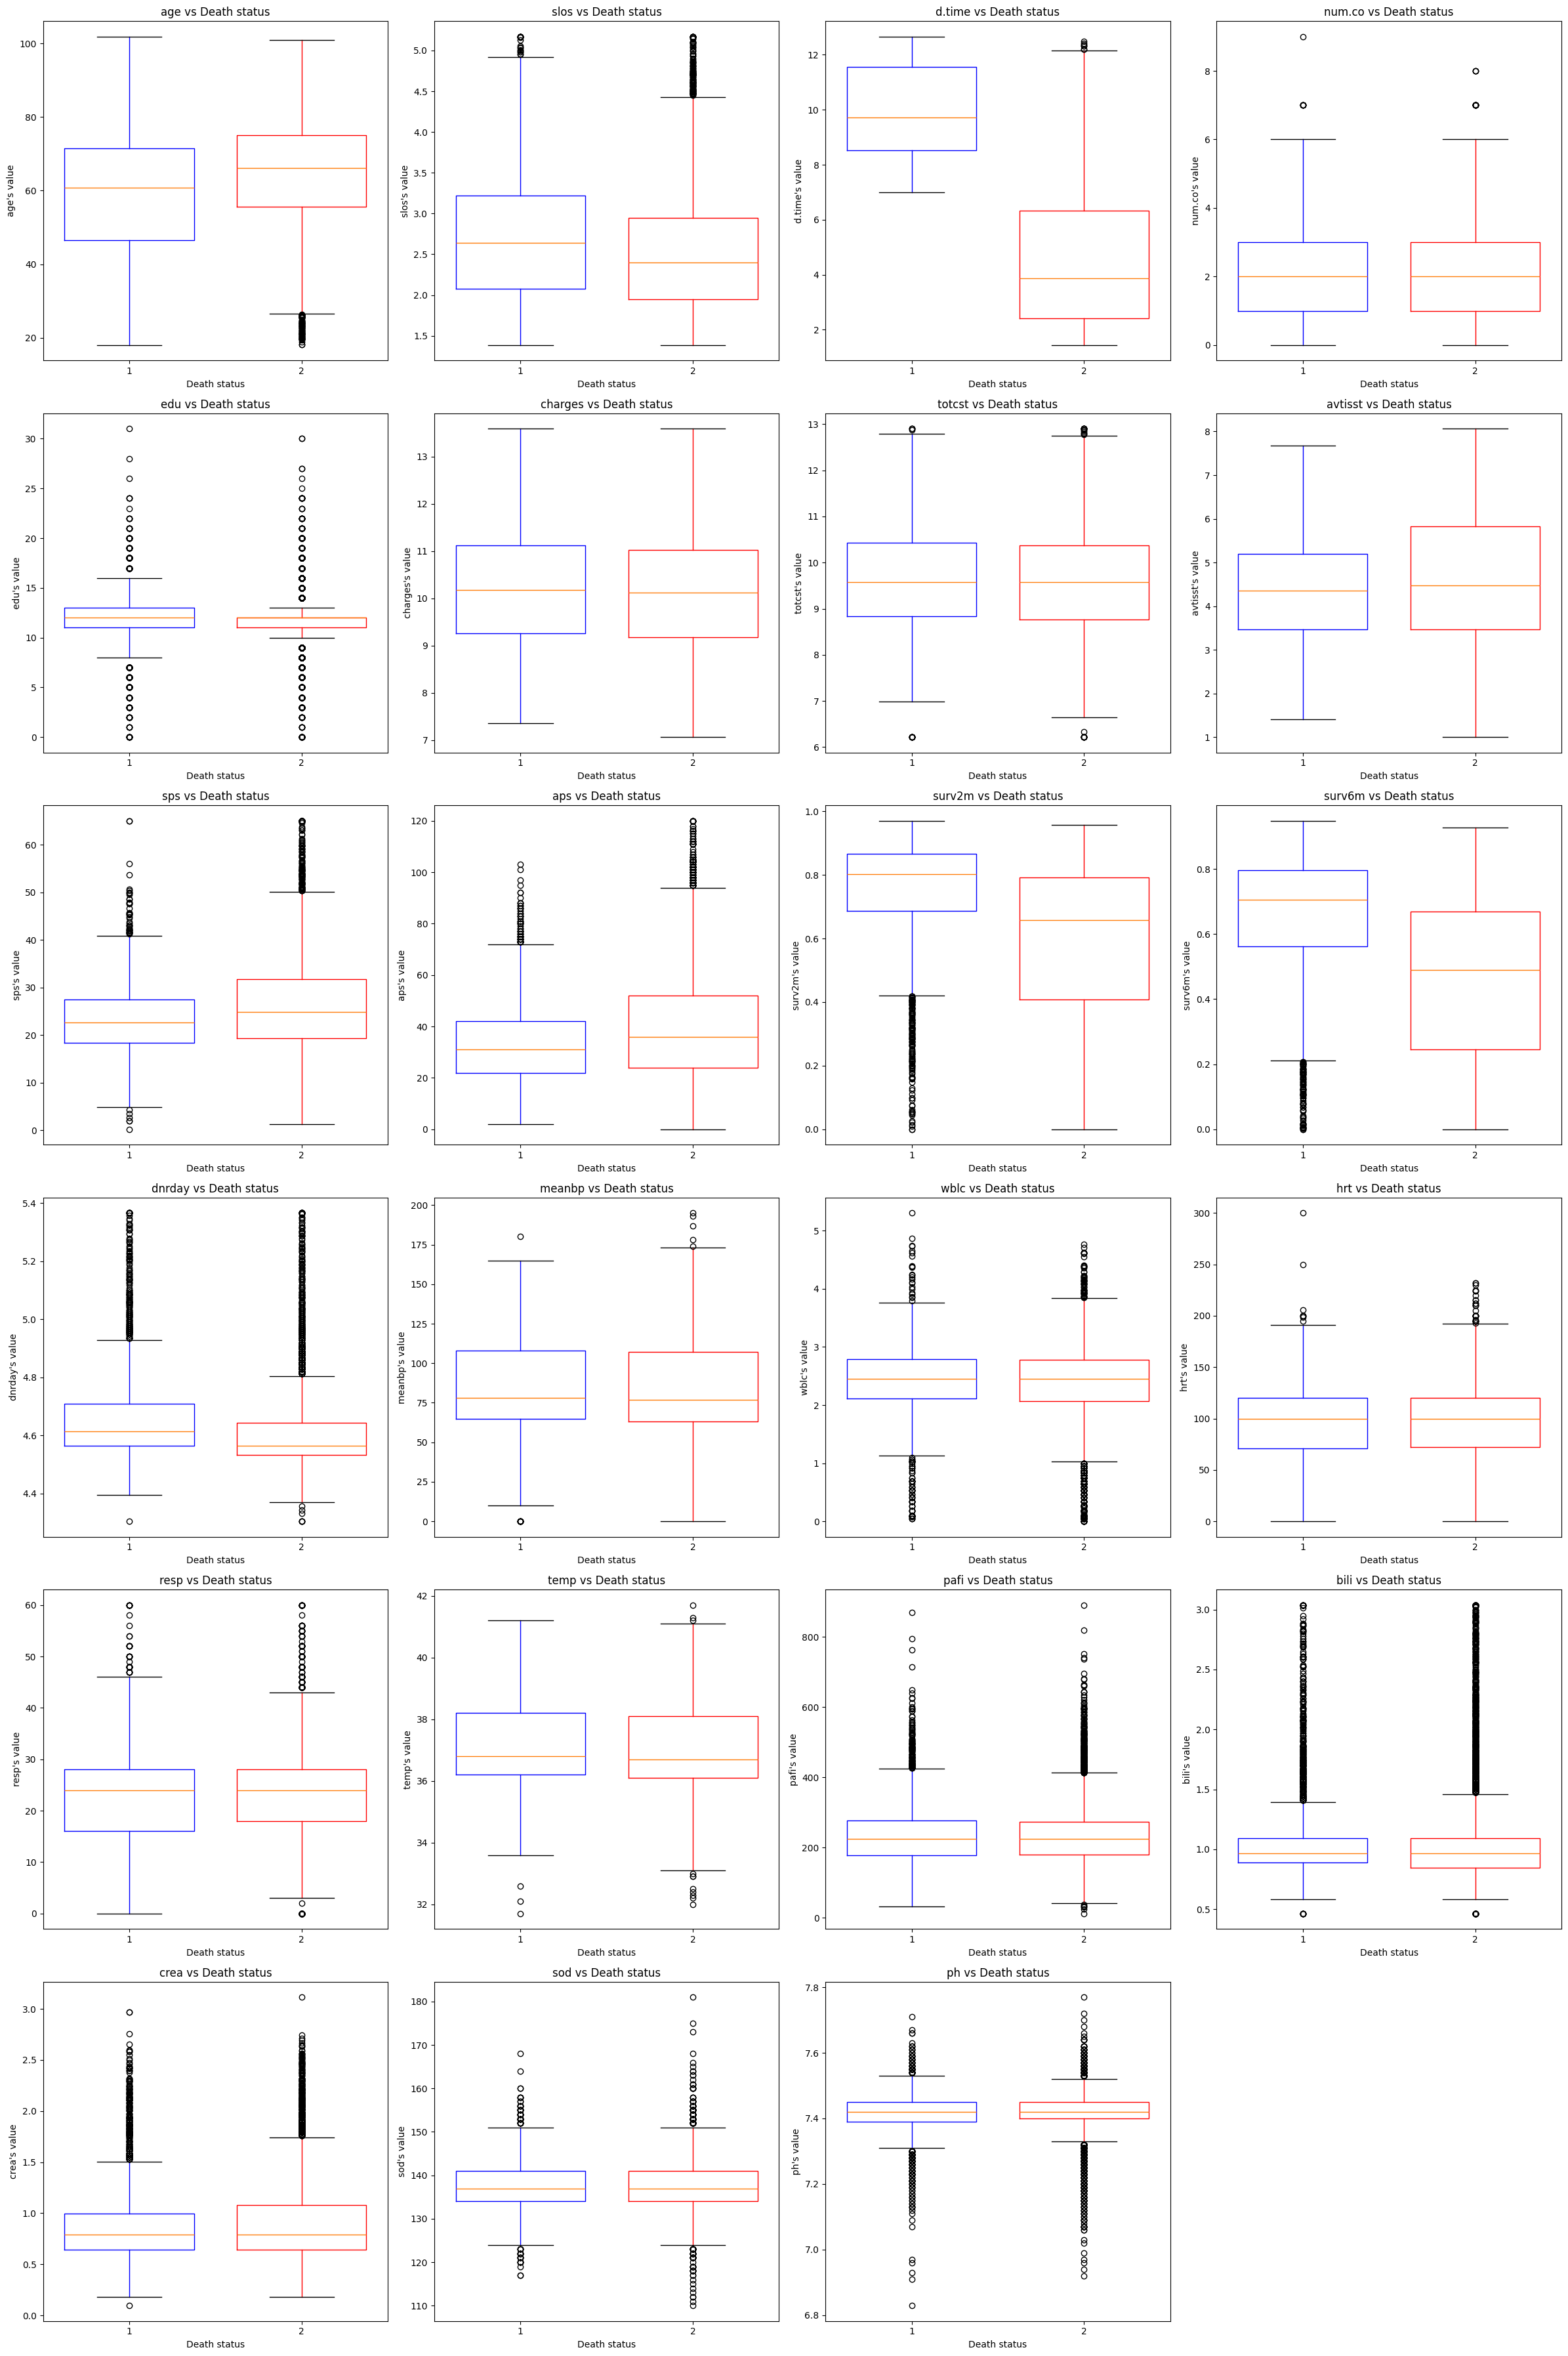

In [ ]:
# Calculate the required number of rows and columns for the subplot grid
num_features = len(feature_con_col)
num_cols = 4  # Number of columns in the grid
num_rows = math.ceil(num_features / num_cols)  # Calculate rows based on features

plt.figure(figsize=(24, num_rows * 6))  # Adjust figure size based on number of rows

# Separate True (death=1) and False (death=0) targets
target_is_T = target_DF.index[target_DF == True]
target_is_F = target_DF.index[target_DF == False]

# Iterate over continuous columns and create boxplots for each
for i, feature in enumerate(feature_con_col):
    plt.subplot(num_rows, num_cols, i + 1)

    plt.xlabel("Death status")
    plt.boxplot(clean_feature_DF.loc[target_is_F.to_list(), feature].dropna(),
                positions=[1],
                widths=0.75,
                boxprops=dict(color='blue'),
                whiskerprops=dict(color='blue'))

    plt.boxplot(clean_feature_DF.loc[target_is_T.to_list(), feature].dropna(),
                positions=[2],
                widths=0.75,
                boxprops=dict(color='red'),
                whiskerprops=dict(color='red'))

    plt.ylabel(f"{feature}'s value")
    plt.title(f"{feature} vs Death status")

# Show the plot
plt.tight_layout()
plt.show()

Features show different correlativeness according to the boxplot
- clear diff : d.time, surv2m, surv6m
- slightly : age, slos, edu?, sps, aps, dnrday
- no diff : num.co, charge, totcst, avtisst, meanbp, wblc, hrt, resp, temp, pafi, bili, crea, sod, ph,

Some of visualization with plot alone would is not enough, so we are moving on to the statistical correlation before deciding.

### 8.1.2 Statistical correlation

using anova to final select continuous features to check if there is any relationship between the given continuous and categorical variable

- Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
- If the ANOVA P-Value is <0.05, that means we reject H0



In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [ ]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables= feature_con_col
FunctionAnova(inpData=clean_feature_DF, TargetVariable=target_DF, ContinuousPredictorList=ContinuousVariables)


##### ANOVA Results ##### 

age is correlated with 0       0
1       1
2       1
3       1
4       0
       ..
9100    0
9101    0
9102    0
9103    1
9104    1
Name: death, Length: 9103, dtype: int64 | P-Value: 1.2799900654775065e-66
slos is correlated with 0       0
1       1
2       1
3       1
4       0
       ..
9100    0
9101    0
9102    0
9103    1
9104    1
Name: death, Length: 9103, dtype: int64 | P-Value: 2.2925240135254517e-28
d.time is correlated with 0       0
1       1
2       1
3       1
4       0
       ..
9100    0
9101    0
9102    0
9103    1
9104    1
Name: death, Length: 9103, dtype: int64 | P-Value: 0.0
num.co is correlated with 0       0
1       1
2       1
3       1
4       0
       ..
9100    0
9101    0
9102    0
9103    1
9104    1
Name: death, Length: 9103, dtype: int64 | P-Value: 5.596617011978085e-11
edu is NOT correlated with 0       0
1       1
2       1
3       1
4       0
       ..
9100    0
9101    0
9102    0
9103    1
9104    1
Name: death, Length:

['age',
 'slos',
 'd.time',
 'num.co',
 'charges',
 'totcst',
 'avtisst',
 'sps',
 'aps',
 'surv2m',
 'surv6m',
 'dnrday',
 'meanbp',
 'wblc',
 'temp',
 'crea']

Feature correlation with the target variable `death`

(ranks most correlate to min)

1. **d.time** - Very strong correlation (P-value: 0.0)
2. **surv6m** - Very strong correlation (P-value: 1.33e-307)
3. **surv2m** - Very strong correlation (P-value: 4.74e-223)
4. **age** - Strong correlation (P-value: 1.28e-66)
5. **dnrday** - Strong correlation (P-value: 1.01e-60)
6. **sps** - Strong correlation (P-value: 1.16e-51)
7. **aps** - Strong correlation (P-value: 3.34e-51)
8. **slos** - Strong correlation (P-value: 2.29e-28)
9. **avtisst** - Significant correlation (P-value: 5.90e-19)
10. **num.co** - Significant correlation (P-value: 5.60e-11)
11. **crea** - Moderate correlation (P-value: 0.0005)
12. **wblc** - Moderate correlation (P-value: 0.00197)
13. **charges** - Moderate correlation (P-value: 0.0021)
14. **meanbp** - Moderate correlation (P-value: 0.0025)
15. **temp** - Moderate correlation (P-value: 0.0050)
16. **totcst** - Lower correlation but still significant (P-value: 0.0126)

The top features like `d.time`, `surv6m`, and `surv2m` demonstrate the strongest correlation with `death`, while the lower-ranked features may still hold predictive value but with less correlation.

### 8.1.3 Updated Distribution of cleaned feature

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'slos'}>,
        <Axes: title={'center': 'd.time'}>,
        <Axes: title={'center': 'num.co'}>,
        <Axes: title={'center': 'edu'}>],
       [<Axes: title={'center': 'charges'}>,
        <Axes: title={'center': 'totcst'}>,
        <Axes: title={'center': 'avtisst'}>,
        <Axes: title={'center': 'sps'}>, <Axes: title={'center': 'aps'}>],
       [<Axes: title={'center': 'surv2m'}>,
        <Axes: title={'center': 'surv6m'}>,
        <Axes: title={'center': 'dnrday'}>,
        <Axes: title={'center': 'meanbp'}>,
        <Axes: title={'center': 'wblc'}>],
       [<Axes: title={'center': 'hrt'}>,
        <Axes: title={'center': 'resp'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'pafi'}>,
        <Axes: title={'center': 'bili'}>],
       [<Axes: title={'center': 'crea'}>,
        <Axes: title={'center': 'sod'}>, <Axes: title={'center': 'ph'}>,
        <Axes: >, <Axes: >]], dtyp

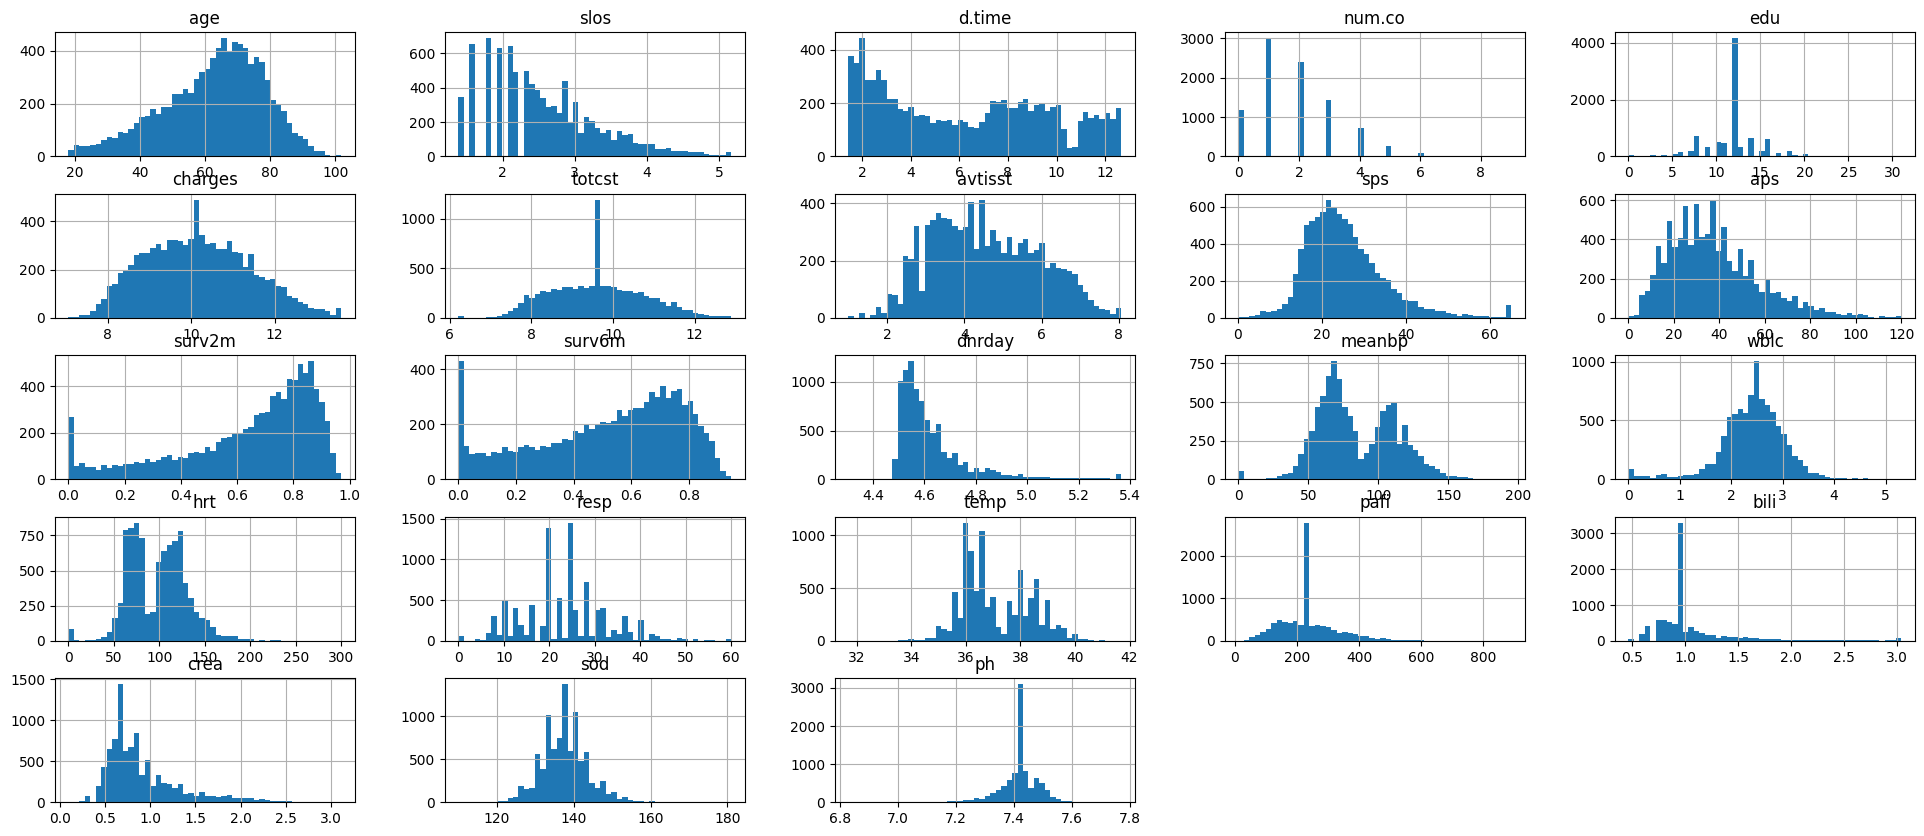

In [ ]:
# Plotting histograms of multiple columns together
clean_feature_DF.hist(feature_con_col, figsize=(24, 10), bins=50)

Correlate, No skew:
        
      ['age', 'num.co', 'charges', 'totcst', 'avtisst', 'sps', 'aps', 'wblc'], (selected)
Double bell :
          
      ['meanbp', 'hrt'] (selected)
Correlate, skewed:

      ['slos', 'd.time', 'surv2m', 'surv6m', 'dnrday', 'temp', 'crea']

### Summary
from 8.1.1 We have selected feature that show different between 'death' and 'survive' patient to tell correlationship using the box plot
- clear diff : d.time, surv2m, surv6m
- slightly : age, slos, edu?, sps, aps, dnrday
- no diff : num.co, charge, totcst, avtisst, meanbp, wblc, hrt, resp, temp, pafi, bili, crea, sod, ph,


from 8.1.2 Anova help confirm Visual Correlation's result
giving us continuous feature that correlate with target :
      
      ['age', 'slos', 'd.time', 'num.co', 'charges', 'totcst', 'avtisst', 'sps', 'aps', 'surv2m', 'surv6m', 'dnrday', 'meanbp', 'wblc', 'temp', 'crea']

from 8.1.3 We use updated distribution to finally select features
      
      Correlate, No skew: ['age', 'num.co', 'charges', 'totcst', 'avtisst', 'sps', 'aps', 'wblc'], (selected)
      Double bell : ['meanbp', 'hrt'] (selected)
      Correlate, skewed: ['slos', 'd.time', 'surv2m', 'surv6m', 'dnrday', 'temp', 'crea']
Among skewed and Double bell shaped data
- 'temp' 'meanbp' and 'crea' has low correlation compared to the rest will not be selected.
- the rest has high correlation or non-skewed data and will still be used for training.

selected continuous features :
            
      ['age', 'num.co', 'charges', 'totcst', 'avtisst', 'sps', 'aps', 'wblc', 'slos', 'd.time', 'surv2m', 'surv6m', 'dnrday', 'hrt']


##8.2 Catagorical feature (vs continuous target)

### 8.2.1 Visual correlation
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots and stackbar to clearly see percentage different between each *catagory*

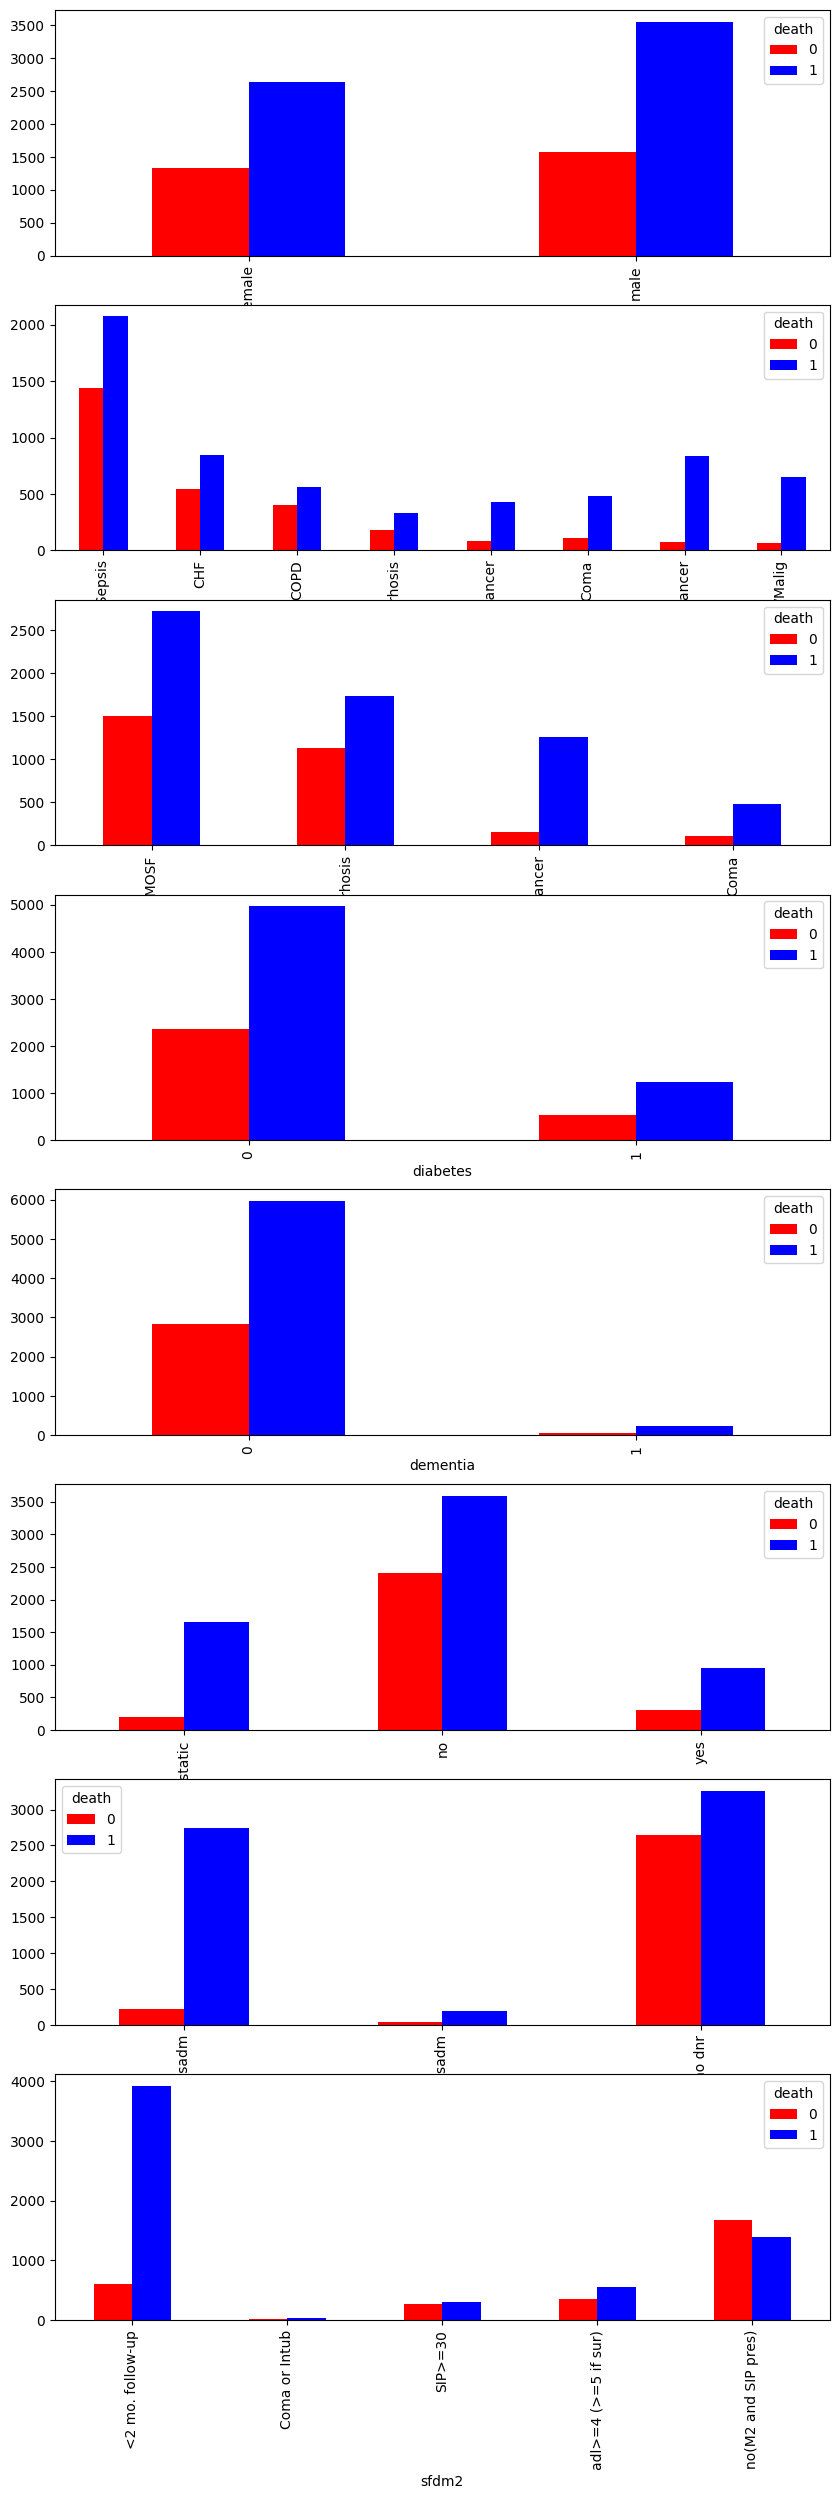

In [ ]:
CategoricalColsList = feature_cat_col

fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,30))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Clicked"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=clean_feature_DF[CategoricalCol], columns=target_DF)
    CrossTabResult.plot.bar(color=['red','blue'], ax=PlotCanvas[i])

from Bar plot, some features's columnsre imbalanced making it hard to tell from barplot alone, so we are plotting StackBar with percentage next

In [ ]:
#Group by n1
def PlotCatStackBar(n1,n2):
  # สร้าง stack barplot
  cross_tab = pd.crosstab(clean_feature_DF[n1], n2)
  ax = cross_tab.plot(kind='bar', stacked=True, figsize=(10, 5))
  Percent = cross_tab.div(cross_tab.sum(axis=1), axis=0).values.T.flatten()
  # print(cross_tab.div(cross_tab.sum(axis=1), axis=0))
  # กำหนดชื่อแกน x และ y
  plt.xlabel(f'{n1}')
  plt.ylabel('Count')

  # กำหนดชื่อสำหรับแต่ละส่วนของ stack barplot
  ax.legend(title='Death')

  # เพิ่มเปอร์เซ็นต์ในกราฟ
  for i,p in enumerate(ax.patches):
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy()
      if height != 0:
          percent = Percent[i]
          ax.annotate(f'{percent:.2%}({height:.0f})', (x + width / 2, y + height + 0.01), ha='center', fontsize=10)

  # แสดงกราฟ
  plt.tight_layout()
  plt.show()

['sex', 'dzgroup', 'dzclass', 'diabetes', 'dementia', 'ca', 'dnr', 'sfdm2']


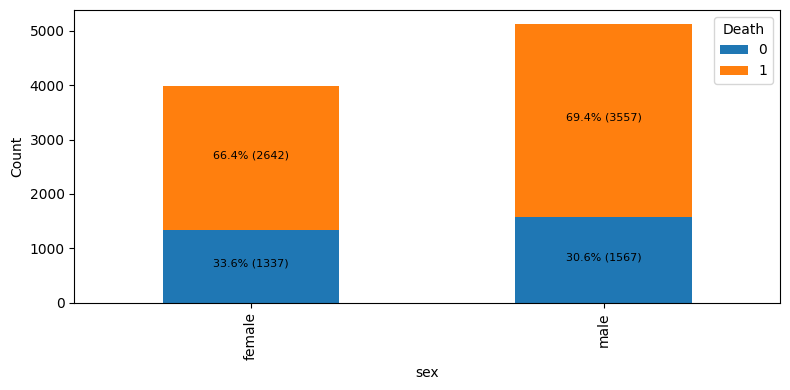

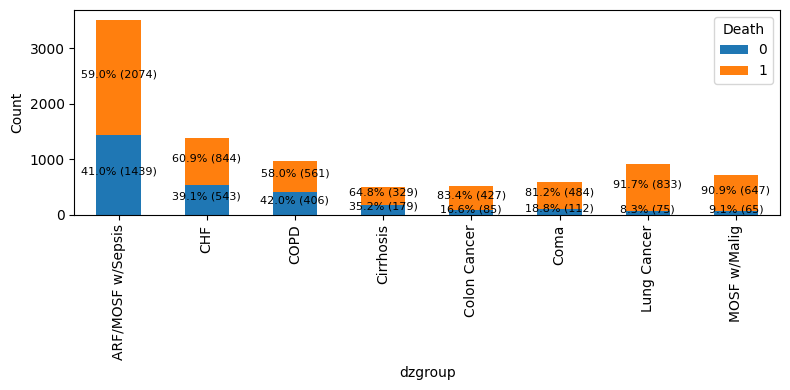

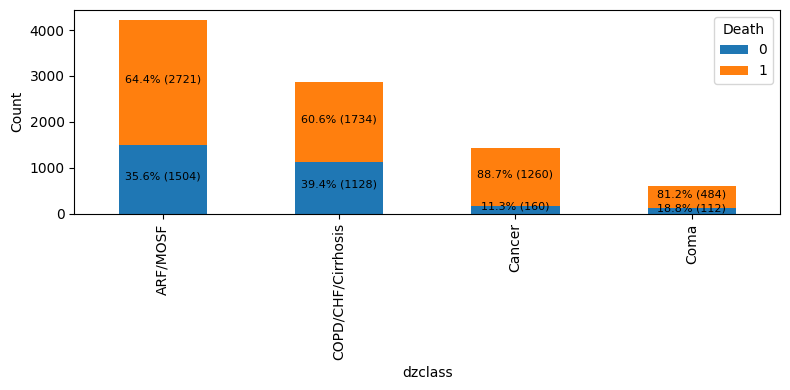

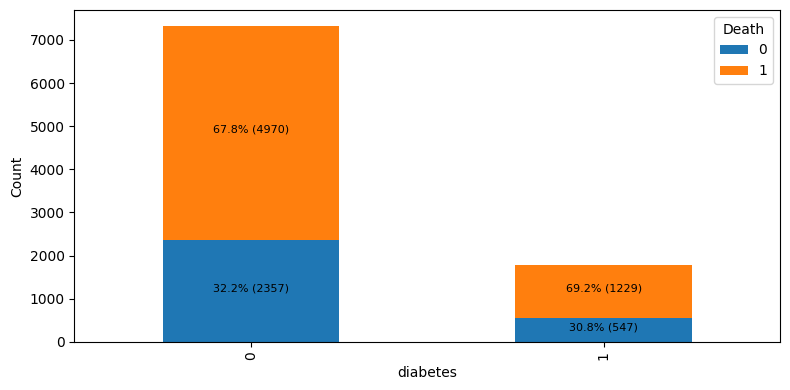

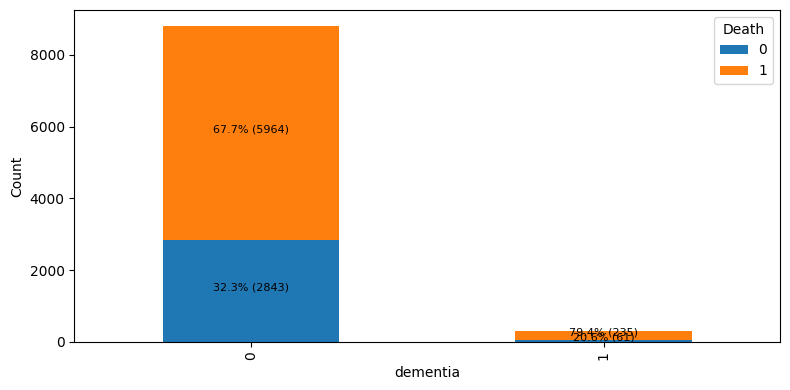

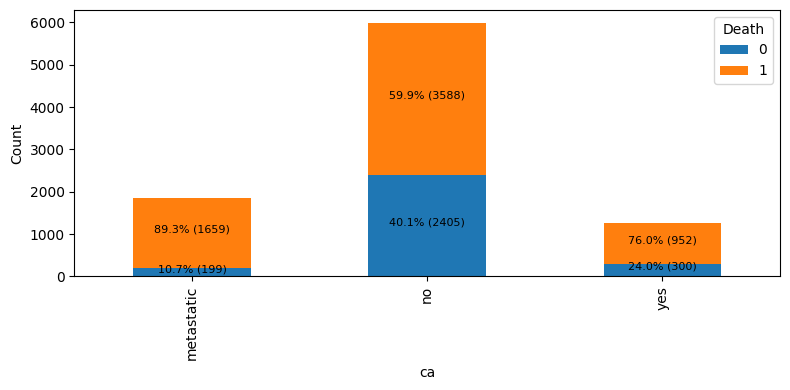

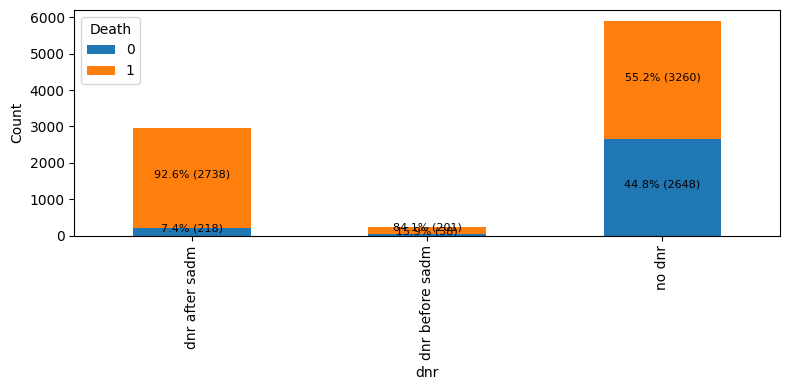

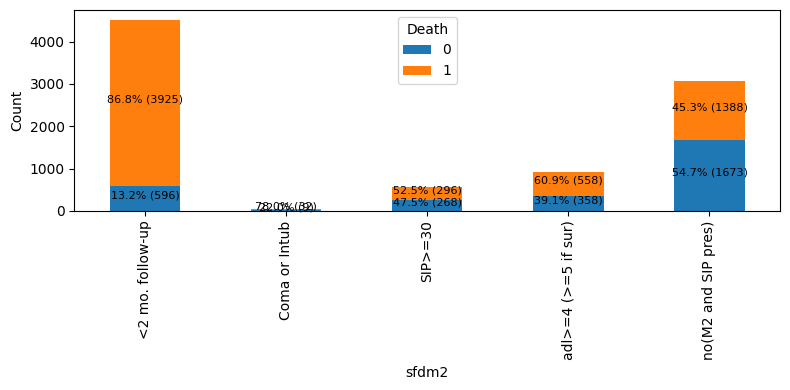

In [ ]:
print(feature_cat_col)

for c in feature_cat_col:
  PlotCatStackBar(c,target_DF)

**Notable Observations for Model Training**:

- **Critical Predictors**:
  - **DNR Status** (especially DNR after admission) and **metastatic cancer** show strong associations with mortality.
  - **Dementia** also stand out as high-risk factors.

- **High-Risk Indicators**:
  - Features with mortality over 80%—such as **DNR after admission**, **lung cancer**, and **metastatic cancer**—should be prioritized as high-risk indicators in the model.

- **Demographic and Disease Class Importance**:
  - Sex, disease class (dzclass), and specific high-mortality disease groups may enhance the model’s demographic and disease-related risk assessment.

  We have basic observation and have basic idea of each features by columns (These can't be seen with Chi-square) , We can proceed with statistical feature selection.

### 8.2.2 Statistical Feature Selection

We are conducting Chi-square test to further validate result of feature selection more than just visualizing

Assumption(H0): The two columns are NOT related to each other
Result of Chi-Sq Test: The Probability of H0 being True

In [ ]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetDF, CategoricalVariablesList):
    from scipy.stats import chi2_contingency

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=TargetDF, columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)

        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', ' Death ' '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', ' Death ', '| P-Value:', ChiSqResult[1])

    return(SelectedPredictors)

In [ ]:

# Calling the function
FunctionChisq(inpData=clean_feature_DF, TargetDF=target_DF, CategoricalVariablesList= feature_cat_col)


sex is correlated with  Death | P-Value: 0.0023378076949200936
dzgroup is correlated with  Death | P-Value: 3.289777802511318e-151
dzclass is correlated with  Death | P-Value: 4.353424421773212e-92
diabetes is NOT correlated with  Death  | P-Value: 0.27914204823408834
dementia is correlated with  Death | P-Value: 2.9829724982532404e-05
ca is correlated with  Death | P-Value: 1.418640575680466e-132
dnr is correlated with  Death | P-Value: 3.8050940091933175e-283
sfdm2 is correlated with  Death | P-Value: 0.0


['sex', 'dzgroup', 'dzclass', 'dementia', 'ca', 'dnr', 'sfdm2']

**Key Correlated Features (Chi-Square & Stackbar Insights):**

- **dzgroup**: Strong correlation with death, especially high mortality in cancer and coma cases.
- **dzclass**: Significant link to death; coma and advanced illness groups showed higher mortality.
- **dnr**: Very strong correlation; DNR status after admission showed notably high death rates.
- **ca (Cancer Presence)**: Strongly associated with death, with metastatic cancer patients showing especially high mortality.
- **dementia**: Correlated with death, with a higher death rate among dementia patients.
- **sfdm2**: Perfectly correlated, distinguishing patient outcomes well.
- **sex**: Mild correlation; less impact than other factors.

**Non-Significant Feature**:
- **diabetes**: Not significantly related to death, with little effect on mortality outcomes.

This summary confirms key predictors and highlights influential features for model selection.

### 8.2.3 Updated Distribution of cleaned feature

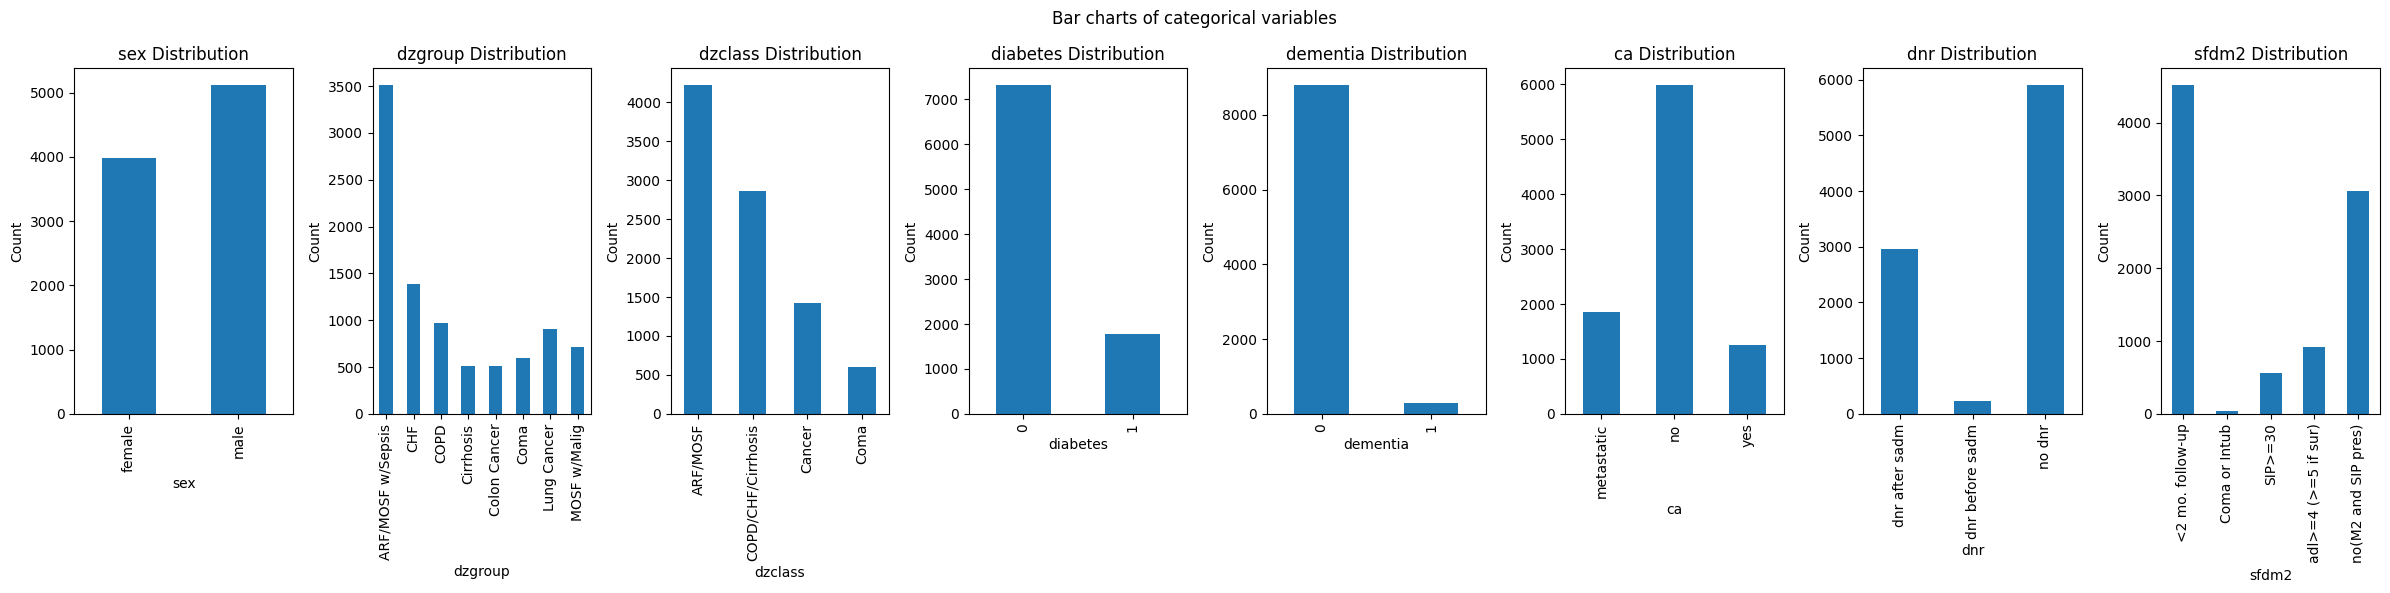

In [ ]:
PlotBarCharts(clean_feature_DF, feature_cat_col)

### Summary
- from 8.1.1 Most selected catagorical feature shows correlation with 'death' due to them being dicease that could lead to death, although some feature have imbalance columns which may require binning.
- from 8.1.2 According to Chi-SQ test we have catagorical feature that are corelative to the target 'death' including

      ['sex', 'dzgroup', 'dzclass', 'dementia', 'ca', 'dnr', 'sfdm2']
- 'dementia' show correlation but it is highly bias toward 0 , consider removal
- sfdm2 also have 1 column that directly apply to an already dead patient which may not be needed.

final selected catagorical feature

      ['sex', 'dzgroup', 'dzclass', 'ca', 'dnr', 'sfdm2']


# 9.Finalize predictors for machine learning

Based on the above tests, selecting the final columns for machine learning

- Continuous Data : ['age', 'slos', 'd.time', 'num.co', 'scoma', 'sps', 'aps', 'surv2m', 'surv6m', 'meanbp', 'temp', 'adlsc']
- Catagorical Data : ['sex', 'dzgroup', 'dzclass', 'ca', 'dnr', 'sfdm2']

Most of the finally selected feature are data related to health, disease, lab result and frequency of check up. which prove the hypothesis to be truth.
Whereas 'sex' is an unexpected variable proving that male and female does have different rate of survival according to this data. (only slight differents)

In [ ]:
selected_con_feature =  ['age', 'num.co', 'charges', 'totcst', 'avtisst', 'sps', 'aps', 'wblc', 'slos', 'd.time', 'surv2m', 'surv6m', 'dnrday', 'hrt']# scoma has random distribute

selected_cat_feature = ['sex', 'dzgroup', 'dzclass', 'ca', 'dnr', 'sfdm2']

DataForML = clean_feature_DF[selected_con_feature + selected_cat_feature]
DataForML.head()


,age,num.co,charges,totcst,avtisst,sps,aps,wblc,slos,d.time,surv2m,surv6m,dnrday,hrt,sex,dzgroup,dzclass,ca,dnr,sfdm2
0,62.84998,0,9.181529,9.578708,2.645751,33.898438,20.0,1.945910,1.791759,12.659815,0.262939,0.036995,4.543295,69.0,male,Lung Cancer,Cancer,metastatic,no dnr,<2 mo. follow-up
1,60.33899,2,10.448628,9.578708,5.385165,52.695312,74.0,2.895782,1.609438,1.587401,0.001000,0.000000,4.584967,112.0,female,Cirrhosis,COPD/CHF/Cirrhosis,no,no dnr,<2 mo. follow-up
2,52.74698,2,10.623642,9.578708,3.605551,20.500000,45.0,2.251292,2.890372,3.608826,0.790894,0.664917,4.663439,88.0,female,Cirrhosis,COPD/CHF/Cirrhosis,no,no dnr,<2 mo. follow-up
3,42.38498,2,8.031385,9.578708,2.645751,20.097656,19.0,2.312497,1.386294,5.104469,0.698975,0.411987,4.521789,88.0,female,Lung Cancer,Cancer,metastatic,no dnr,no(M2 and SIP pres)
4,79.88495,1,10.822335,9.578708,4.320493,23.500000,30.0,2.674149,2.833213,12.659815,0.634888,0.532959,4.653960,112.0,female,ARF/MOSF w/Sepsis,ARF/MOSF,no,no dnr,no(M2 and SIP pres)


# 10.Data Pre-processing for Machine Learning



## 10.1 Converting the ordinal variable to numeric

sfdm2 is the only feature that show similarity ordinal variables but it is not clear enough and will be treated with nominal.

Therefore, the 10.1 step is skipped.

In [ ]:
# No ordinal catagorical variable found in selected features.

## 10.2 Converting the binary variable to numeric

In [ ]:
# Treating the binary nominal variables first
DataForML['sex'].replace({'male':1, 'female':0}, inplace=True)

# Looking at data after nominal treatment
DataForML.head()


<ipython-input-450-149f07b0e1f3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DataForML['sex'].replace({'male':1, 'female':0}, inplace=True)
<ipython-input-450-149f07b0e1f3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DataForML['sex'].replace({'male':1, 'female':0}, inplace=True)
<ipython-i

,age,num.co,charges,totcst,avtisst,sps,aps,wblc,slos,d.time,surv2m,surv6m,dnrday,hrt,sex,dzgroup,dzclass,ca,dnr,sfdm2
0,62.84998,0,9.181529,9.578708,2.645751,33.898438,20.0,1.945910,1.791759,12.659815,0.262939,0.036995,4.543295,69.0,1,Lung Cancer,Cancer,metastatic,no dnr,<2 mo. follow-up
1,60.33899,2,10.448628,9.578708,5.385165,52.695312,74.0,2.895782,1.609438,1.587401,0.001000,0.000000,4.584967,112.0,0,Cirrhosis,COPD/CHF/Cirrhosis,no,no dnr,<2 mo. follow-up
2,52.74698,2,10.623642,9.578708,3.605551,20.500000,45.0,2.251292,2.890372,3.608826,0.790894,0.664917,4.663439,88.0,0,Cirrhosis,COPD/CHF/Cirrhosis,no,no dnr,<2 mo. follow-up
3,42.38498,2,8.031385,9.578708,2.645751,20.097656,19.0,2.312497,1.386294,5.104469,0.698975,0.411987,4.521789,88.0,0,Lung Cancer,Cancer,metastatic,no dnr,no(M2 and SIP pres)
4,79.88495,1,10.822335,9.578708,4.320493,23.500000,30.0,2.674149,2.833213,12.659815,0.634888,0.532959,4.653960,112.0,0,ARF/MOSF w/Sepsis,ARF/MOSF,no,no dnr,no(M2 and SIP pres)


## 10.3 Converting the nominal variable to numeric using get_dummies()


In [ ]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

#DataForML_Numeric['death']=target_DF
# Printing sample rows
DataForML_Numeric.head()




,age,num.co,charges,totcst,avtisst,sps,aps,wblc,slos,d.time,...,ca_no,ca_yes,dnr_dnr after sadm,dnr_dnr before sadm,dnr_no dnr,sfdm2_<2 mo. follow-up,sfdm2_Coma or Intub,sfdm2_SIP>=30,sfdm2_adl>=4 (>=5 if sur),sfdm2_no(M2 and SIP pres)
0,62.84998,0,9.181529,9.578708,2.645751,33.898438,20.0,1.945910,1.791759,12.659815,...,False,False,False,False,True,True,False,False,False,False
1,60.33899,2,10.448628,9.578708,5.385165,52.695312,74.0,2.895782,1.609438,1.587401,...,True,False,False,False,True,True,False,False,False,False
2,52.74698,2,10.623642,9.578708,3.605551,20.500000,45.0,2.251292,2.890372,3.608826,...,True,False,False,False,True,True,False,False,False,False
3,42.38498,2,8.031385,9.578708,2.645751,20.097656,19.0,2.312497,1.386294,5.104469,...,False,False,False,False,True,False,False,False,False,True
4,79.88495,1,10.822335,9.578708,4.320493,23.500000,30.0,2.674149,2.833213,12.659815,...,True,False,False,False,True,False,False,False,False,True


## 10.4 Data Transformation

- Standardization/Normalization of data **ของเราน่าจะทำแล้วเทียบ ว่าต่างกันไง

You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data.

However, if you are using KNN or Neural Networks, then this step should be recommended.





In [ ]:
# Printing all the column names for our reference
DataForML_Numeric.columns


Index(['age', 'num.co', 'charges', 'totcst', 'avtisst', 'sps', 'aps', 'wblc',
       'slos', 'd.time', 'surv2m', 'surv6m', 'dnrday', 'hrt', 'sex',
       'dzgroup_ARF/MOSF w/Sepsis', 'dzgroup_CHF', 'dzgroup_COPD',
       'dzgroup_Cirrhosis', 'dzgroup_Colon Cancer', 'dzgroup_Coma',
       'dzgroup_Lung Cancer', 'dzgroup_MOSF w/Malig', 'dzclass_ARF/MOSF',
       'dzclass_COPD/CHF/Cirrhosis', 'dzclass_Cancer', 'dzclass_Coma',
       'ca_metastatic', 'ca_no', 'ca_yes', 'dnr_dnr after sadm',
       'dnr_dnr before sadm', 'dnr_no dnr', 'sfdm2_<2 mo. follow-up',
       'sfdm2_Coma or Intub', 'sfdm2_SIP>=30', 'sfdm2_adl>=4 (>=5 if sur)',
       'sfdm2_no(M2 and SIP pres)'],
      dtype='object')

In [ ]:
TargetVariable = 'death'
Predictors = ['age', 'num.co', 'charges', 'totcst', 'avtisst', 'sps', 'aps', 'wblc',
       'slos', 'd.time', 'surv2m', 'surv6m', 'dnrday', 'hrt', 'sex',
       'dzgroup_ARF/MOSF w/Sepsis', 'dzgroup_CHF', 'dzgroup_COPD',
       'dzgroup_Cirrhosis', 'dzgroup_Colon Cancer', 'dzgroup_Coma',
       'dzgroup_Lung Cancer', 'dzgroup_MOSF w/Malig', 'dzclass_ARF/MOSF',
       'dzclass_COPD/CHF/Cirrhosis', 'dzclass_Cancer', 'dzclass_Coma',
       'ca_metastatic', 'ca_no', 'ca_yes', 'dnr_dnr after sadm',
       'dnr_dnr before sadm', 'dnr_no dnr', 'sfdm2_<2 mo. follow-up',
       'sfdm2_Coma or Intub', 'sfdm2_SIP>=30', 'sfdm2_adl>=4 (>=5 if sur)',
       'sfdm2_no(M2 and SIP pres)']


X = DataForML_Numeric[Predictors].values
y = target_DF.values
print(X)

[[62.84998 0 9.181529290122063 ... False False False]
 [60.33899 2 10.448627642716774 ... False False False]
 [52.74698 2 10.6236417385826 ... False False False]
 ...
 [70.38196 1 10.748604464955758 ... False False False]
 [47.01999 1 10.975755865864636 ... False False False]
 [81.53894 1 9.65534665470488 ... False False True]]


In [ ]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)



- Splitting the data into Training and Testing sample

We do not use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [ ]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6372, 38)
(6372,)
(2731, 38)
(2731,)


# 11.Model Construction

**Construnted Model list**
- Logistic regression
- Decision Trees
- K-nearest neighbors / KNN
- Random Forest
- SVM
- Neural Network

**Result goal**
- main focus : high recall (high TP, low FN)
- model should primarily focus on the True Positives (TP) and False Negatives (FN) in the confusion matrix:

- True Positives (TP): Cases where the model correctly predicts mortality. Maximizing TPs ensures the model identifies high-risk patients who may need urgent care.
- False Negatives (FN): Cases where the model misses a mortality prediction (predicts survival when the patient actually passes away). Minimizing FNs is critical, as these represent missed high-risk patients, which could have serious consequences in a clinical setting.

- Focusing on these helps improve sensitivity/recall, crucial for mortality prediction to avoid missing high-risk patients.






## 11.1 Logistic Regression

In [ ]:
# Logistic Regression
# from sklearn.linear_model import LogisticRegression

# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg',random_state=42)

# Printing all the parameters of Linear regression
print(clf)
print("*"*100)
print()

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)


# Printing some sample values of prediction
print("Training result prediction")
TrainingPrediction=LOG.predict(X_train)
TrainingDataResults=pd.DataFrame(data=X_train, columns=Predictors)
TrainingDataResults['TargetVariable']=y_train
TrainingDataResults[('Predicted'+TargetVariable)]=np.round(TrainingPrediction)

# Printing sample prediction values
print(TrainingDataResults.head())
print("*"*100)
print()

# Printing some sample values of prediction
print("Testing result prediction")
TestingPrediction=LOG.predict(X_test)
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(TestingPrediction)

# Printing sample prediction values
print(TestingDataResults.head())
print("*"*100)
print()


# from sklearn import metrics
# from sklearn.metrics import classification_report,confusion_matrix
# Measuring Goodness of fit
print("The results of training data")
print(metrics.classification_report(y_train, TrainingPrediction))
print(metrics.confusion_matrix(y_train, TrainingPrediction))
print("*"*100)
print()
print("The results of testing data")
print(metrics.classification_report(y_test, TestingPrediction))
print(metrics.confusion_matrix(y_test, TestingPrediction))


LogisticRegression(C=1, random_state=42, solver='newton-cg')
****************************************************************************************************

Training result prediction
        age    num.co   charges    totcst   avtisst       sps       aps  \
0  0.593072  0.333333  0.283570  0.367416  0.348911  0.523052  0.291667   
1  0.474000  0.222222  0.499417  0.539177  0.328029  0.401223  0.300000   
2  0.605028  0.111111  0.374895  0.456325  0.375444  0.282408  0.291667   
3  0.133618  0.111111  0.222751  0.234817  0.483681  0.344136  0.275000   
4  0.889650  0.333333  0.209466  0.241782  0.406808  0.253050  0.208333   

       wblc      slos    d.time  ...  dnr_dnr after sadm  dnr_dnr before sadm  \
0  0.379933  0.183169  0.124948  ...                 0.0                  0.0   
1  0.474717  0.382359  0.645227  ...                 0.0                  0.0   
2  0.494896  0.397464  0.109306  ...                 1.0                  0.0   
3  0.460533  0.000000  0.640864  ..

### Summary
- The logistic regression model demonstrates good performance on both training and testing data, with balanced precision and recall, particularly high for predicting deaths (Class 1).
- The model maintains high accuracy and precision, suggesting that the selected features (age, slos, d.time, num.co, etc.) provide strong predictive power for mortality outcomes.

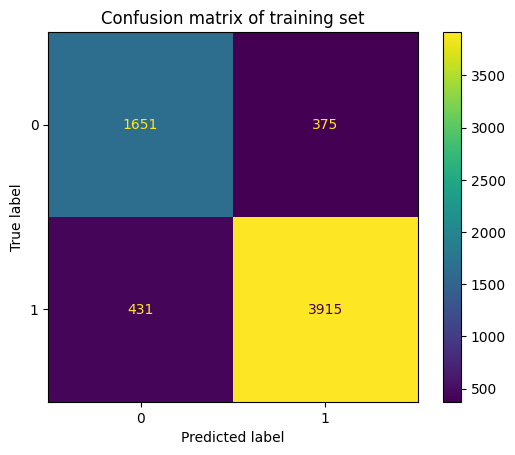

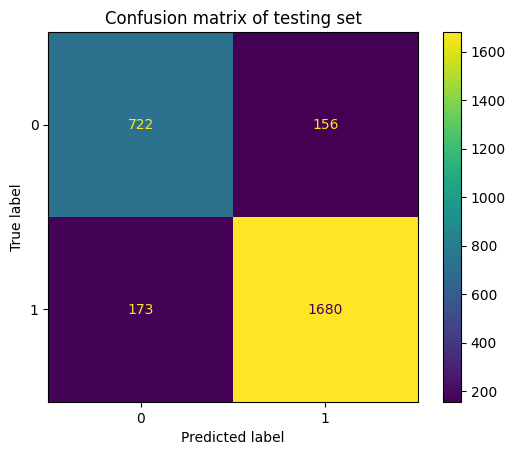

In [ ]:
# Plot confusion matrix of training set
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_true=y_train, y_pred=TrainingPrediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=list(set(y_train)))
disp.plot()
plt.title('Confusion matrix of training set')
plt.show()

cm = confusion_matrix(y_true=y_test, y_pred=TestingPrediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=list(set(y_test)))
disp.plot()
plt.title('Confusion matrix of testing set')
plt.show()

In [ ]:
#y = theta0 + theta1*x1 +theta2*x2+...+theta5*x5
print("Theta0: ",LOG.intercept_[0])
for i in range(len(Predictors)):
  print("Theta{} x {}: ".format(i+1,Predictors[i]),LOG.coef_[0][i])


Theta0:  6.149166649508243
Theta1 x age:  1.3571634831418031
Theta2 x num.co:  0.16087825505690084
Theta3 x charges:  -2.7243240226251877
Theta4 x totcst:  0.4363992562963778
Theta5 x avtisst:  -0.8679247356444499
Theta6 x sps:  0.029650094176814662
Theta7 x aps:  1.3708486057090135
Theta8 x wblc:  -0.8305636592577547
Theta9 x slos:  1.5553127617392424
Theta10 x d.time:  -8.526934631429299
Theta11 x surv2m:  -0.10277543270087633
Theta12 x surv6m:  -0.16221693361261458
Theta13 x dnrday:  0.5295272163374718
Theta14 x hrt:  -0.8257174285483972
Theta15 x sex:  0.15466255709888832
Theta16 x dzgroup_ARF/MOSF w/Sepsis:  -0.6025841145629214
Theta17 x dzgroup_CHF:  0.1555440324204772
Theta18 x dzgroup_COPD:  -0.14976018698923732
Theta19 x dzgroup_Cirrhosis:  -0.15847586774994904
Theta20 x dzgroup_Colon Cancer:  0.08835607405466554
Theta21 x dzgroup_Coma:  -0.3815856959863575
Theta22 x dzgroup_Lung Cancer:  0.48272654289775224
Theta23 x dzgroup_MOSF w/Malig:  0.5686555567085272
Theta24 x dzclass

In [ ]:
# อาจจะเพิ่ม cost function ถ้าในโค้ดยังไม่มี
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function for logistic regression
def compute_cost(X, y, theta):
    m = len(y)  # number of training examples
    h = sigmoid(X @ theta)  # predictions using sigmoid function

    # Calculate the cost
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost
X = np.array([[1, 2], [1, 3], [1, 4]])  # adding a column of 1s for the intercept term
y = np.array([0, 1, 0])                 # binary target variable

# Initialize theta with zeros
theta = np.zeros(X.shape[1])

# Calculate and print the cost
cost = compute_cost(X, y, theta)
print("The cost is:", cost)



The cost is: 0.6931471805599452


## 11.2 Decision Tree

DecisionTreeClassifier(criterion='entropy', max_depth=7)
****************************************************************************************************

Training result prediction
        age    num.co   charges    totcst   avtisst       sps       aps  \
0  0.593072  0.333333  0.283570  0.367416  0.348911  0.523052  0.291667   
1  0.474000  0.222222  0.499417  0.539177  0.328029  0.401223  0.300000   
2  0.605028  0.111111  0.374895  0.456325  0.375444  0.282408  0.291667   
3  0.133618  0.111111  0.222751  0.234817  0.483681  0.344136  0.275000   
4  0.889650  0.333333  0.209466  0.241782  0.406808  0.253050  0.208333   

       wblc      slos    d.time  ...  dnr_dnr after sadm  dnr_dnr before sadm  \
0  0.379933  0.183169  0.124948  ...                 0.0                  0.0   
1  0.474717  0.382359  0.645227  ...                 0.0                  0.0   
2  0.494896  0.397464  0.109306  ...                 1.0                  0.0   
3  0.460533  0.000000  0.640864  ...   

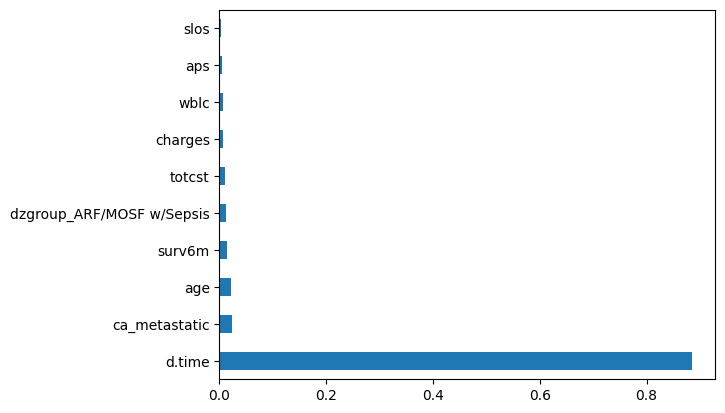

In [ ]:
#Decision Trees
#from sklearn import tree

#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=7,criterion='entropy')
# Or you can find best hyperparameters using GridSearchCV

# Printing all the parameters of Decision Tree
print(clf)
print("*"*100)
print()

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
print("Training result prediction")
TrainingPrediction=DTree.predict(X_train)
TrainingDataResults=pd.DataFrame(data=X_train, columns=Predictors)
TrainingDataResults[TargetVariable]=y_train
TrainingDataResults[('Predicted'+TargetVariable)]=np.round(TrainingPrediction)

# Printing sample prediction values
print(TrainingDataResults.head())
print("*"*100)
print()

# Printing some sample values of prediction
print("Testing result prediction")
TestingPrediction=DTree.predict(X_test)
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(TestingPrediction)

# Printing sample prediction values
print(TestingDataResults.head())
print("*"*100)
print()


# from sklearn import metrics
# from sklearn.metrics import classification_report,confusion_matrix
# Measuring Goodness of fit
print("The results of training data")
print(metrics.classification_report(y_train, TrainingPrediction))
print(metrics.confusion_matrix(y_train, TrainingPrediction))
print("*"*100)
print()
print("The results of testing data")
print(metrics.classification_report(y_test, TestingPrediction))
print(metrics.confusion_matrix(y_test, TestingPrediction))


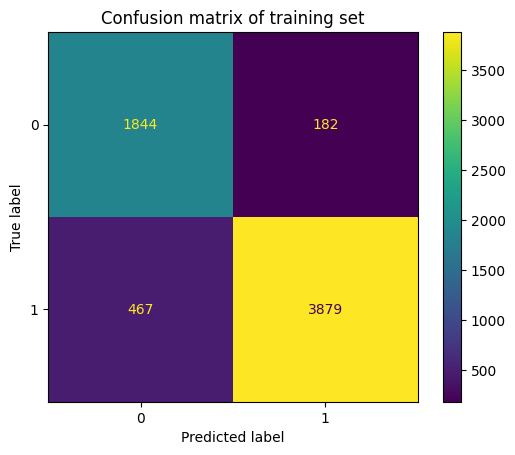

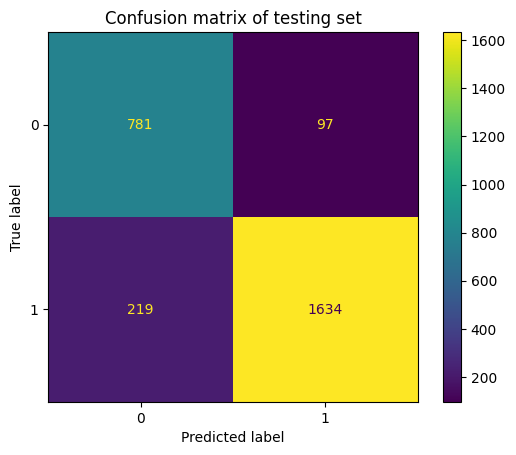

In [ ]:

# Plot confusion matrix of training set

# from sklearn.metrics import plot_confusion_matrix


cm = confusion_matrix(y_true=y_train, y_pred=TrainingPrediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=list(set(y_train)))
disp.plot()
plt.title('Confusion matrix of training set')
plt.show()

cm = confusion_matrix(y_true=y_test, y_pred=TestingPrediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=list(set(y_test)))
disp.plot()
plt.title('Confusion matrix of testing set')
plt.show()

In [ ]:
#Vitualization

from sklearn.tree import export_text
print(export_text(DTree,feature_names=Predictors))

|--- d.time <= 0.50
|   |--- class: 1
|--- d.time >  0.50
|   |--- d.time <= 0.86
|   |   |--- ca_metastatic <= 0.50
|   |   |   |--- dzgroup_ARF/MOSF w/Sepsis <= 0.50
|   |   |   |   |--- wblc <= 0.48
|   |   |   |   |   |--- charges <= 0.16
|   |   |   |   |   |   |--- totcst <= 0.21
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- totcst >  0.21
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- charges >  0.16
|   |   |   |   |   |   |--- aps <= 0.25
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- aps >  0.25
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- wblc >  0.48
|   |   |   |   |   |--- surv6m <= 0.30
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- surv6m >  0.30
|   |   |   |   |   |   |--- surv6m <= 0.73
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- surv6m >  0.73
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- dzgroup_ARF/MOSF w/Sepsis >  0.50
|  

### Summary
The decision tree model performance on both the training and testing datasets:

- High precision for predicting deaths, meaning it has a low false-positive rate in identifying individuals as deceased.
- High recall for both training and testing, indicating the model accurately identifies both survivors and non-survivors.
- Balanced F1 scores between training and testing, suggesting the model is robust in predicting both outcomes without a strong class bias
- The model is highly relying on d.time
In real use, it should be processed to adjust based on correlative disease features to accurately determine result.

## 11.3 k-NN

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the k-NN model
k = 5  # You can adjust this value to tune the model
knn_clf = KNeighborsClassifier(n_neighbors=k)

# Fit the model on the training data
knn_clf.fit(X_train, y_train.ravel())

# Predict on the training and test sets
y_train_pred = knn_clf.predict(X_train)
y_test_pred = knn_clf.predict(X_test)

# Calculate accuracy for training and testing sets
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Evaluate on training data
print("Training Results")
print("Accuracy:", accuracy_train)
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("*" * 100)

# Evaluate on test data
print("Testing Results")
print("Accuracy:", accuracy_test)
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Training Results
Accuracy: 0.8887319522912743
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      2026
           1       0.92      0.92      0.92      4346

    accuracy                           0.89      6372
   macro avg       0.87      0.87      0.87      6372
weighted avg       0.89      0.89      0.89      6372

Confusion Matrix:
 [[1685  341]
 [ 368 3978]]
****************************************************************************************************
Testing Results
Accuracy: 0.8377883559135848
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       878
           1       0.89      0.87      0.88      1853

    accuracy                           0.84      2731
   macro avg       0.81      0.82      0.82      2731
weighted avg       0.84      0.84      0.84      2731

Confusion Matrix:
 [[ 670  208]
 [ 235 1618]]


### Summary
- k-NN model shows good performance, especially in predicting the "deceased" class , with high precision and recall in both training and testing datasets.
- However, there’s a slight decrease in accuracy on the testing data, dropping from 88.6% in training to 83.8%, which suggests some degree of overfitting.
- The model performs better in identifying deceased cases than survivors, as shown by the higher precision, recall, and F1-score for Class 1.
- This characteristic is typical of k-NN models, which can sometimes struggle with generalization on unseen data, especially if the data has complex or overlapping class boundaries.

## 11.4 Random Forest

อาจจะต้องดูวิธีเลือก n_estimators, random_state ไม่ก็หาคำอธิบาย

In [ ]:
# Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators if needed

# Fit the model on the training data
rf_clf.fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
# Evaluate on training data
print("Training Results")
print("Accuracy:", accuracy_train)
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("*" * 100)

# Evaluate on test data
print("Testing Results")
print("Accuracy:", accuracy_test)
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Training Results
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2026
           1       1.00      1.00      1.00      4346

    accuracy                           1.00      6372
   macro avg       1.00      1.00      1.00      6372
weighted avg       1.00      1.00      1.00      6372

Confusion Matrix:
 [[2026    0]
 [   0 4346]]
****************************************************************************************************
Testing Results
Accuracy: 0.8908824606371293
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       878
           1       0.95      0.89      0.92      1853

    accuracy                           0.89      2731
   macro avg       0.87      0.89      0.88      2731
weighted avg       0.90      0.89      0.89      2731

Confusion Matrix:
 [[ 792   86]
 [ 212 1641]]


**Significan Overfit on training model

### Summary
Random Forest model shows perfect performance on the training data, with 100% accuracy, precision, and recall, indicating that it has memorized the training set and likely overfit. However, on the testing data, the accuracy drops to 78.1%, and the model shows a noticeable decline in performance, particularly in predicting
The Random Forest model’s high variance between training and testing performance suggests a need for further tuning to improve its ability to generalize.

## 11.5 Support Vector Machine - SVM




In [ ]:
# Import the SVC (Support Vector Classifier) for SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Support Vector Classifier (SVM)
svm_clf = SVC(kernel='linear', random_state=42)  # You can change the kernel to 'rbf' or other types if needed

# Fit the model on the training data
svm_clf.fit(X_train, y_train.ravel())  # Ensure y_train is the correct shape

# Predict on the training and test sets
y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

# Calculate accuracy for training and testing sets
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Evaluate on training data
print("Training Results")
print("Accuracy:", accuracy_train)
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("*" * 100)

# Evaluate on test data
print("Testing Results")
print("Accuracy:", accuracy_test)
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Training Results
Accuracy: 0.8790018832391714
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      2026
           1       0.93      0.89      0.91      4346

    accuracy                           0.88      6372
   macro avg       0.86      0.87      0.86      6372
weighted avg       0.88      0.88      0.88      6372

Confusion Matrix:
 [[1733  293]
 [ 478 3868]]
****************************************************************************************************
Testing Results
Accuracy: 0.884657634566093
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       878
           1       0.93      0.90      0.91      1853

    accuracy                           0.88      2731
   macro avg       0.86      0.88      0.87      2731
weighted avg       0.89      0.88      0.89      2731

Confusion Matrix:
 [[ 748  130]
 [ 185 1668]]


### Summary
- SVM model performed well on both training and testing datasets, achieving high accuracy (around 88% on both sets).
- Class 1 had higher precision and recall compared to Class 0, indicating that the model was better at identifying positive instances.
- The confusion matrices indicate some misclassifications, but the overall performance is robust.
- The model generalizes well, as shown by similar metrics on training and testing data, suggesting it is not overfitting.

## 11.6 Neural network

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the neural network structure
# You can adjust the number of layers and neurons as needed
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Predict on the training and test sets
y_train_pred = (model.predict(X_train) > 0.5).astype("int32")
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy for training and testing sets
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Evaluate on training data
print("Training Results")
print("Accuracy:", accuracy_train)
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("*" * 100)

# Evaluate on test data
print("Testing Results")
print("Accuracy:", accuracy_test)
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6834 - loss: 0.5329 - val_accuracy: 0.8267 - val_loss: 0.3498
Epoch 2/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8436 - loss: 0.3324 - val_accuracy: 0.8745 - val_loss: 0.2798
Epoch 3/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8590 - loss: 0.2940 - val_accuracy: 0.8494 - val_loss: 0.2874
Epoch 4/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8699 - loss: 0.2750 - val_accuracy: 0.8722 - val_loss: 0.2580
Epoch 5/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8657 - loss: 0.2760 - val_accuracy: 0.8635 - val_loss: 0.2619
Epoch 6/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8800 - loss: 0.2613 - val_accuracy: 0.8682 - val_loss: 0.2641
Epoch 7/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8724 - loss: 0.2611 - val_accuracy: 0.8761 - val_loss: 0.2574
Epoch 8/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8735 - loss: 0.2629 - val_accuracy: 0.8776 - val_

### Summary
- neural network model performs well on both the training and testing datasets, achieving an accuracy of around 89% for each.
- This close match between training and testing accuracy suggests that the model generalizes well and is not overfitting

# 12.Result Analysis

## 12.1 Overall Results across all model
1. Model achieves 70-90% accuracy on average
2. Model has nearly balanced range of precision, recall and f1-score
- although it is slightly bias toward 'death' = 1, due to skewness of sample toward 'death',
- Undersampling technique could be used to handle this.
3. Model Significantly rely on d.time / Days of follow-up
- This prove that Longer Follow-Up Indicates Stability, A shorter d.time could mean that the patient passed away relatively quickly, or indicating a more severe health state.
- in a real case, features that is directly relate to target like 'd.time' should be used along with correlative disease features to avoid bias-ness



## **12.2 Model Comparison Summary**

Got it! Here’s a bullet-point summary, phrased in a way that’s easy to understand, with a natural flow and without rigid, repetitive headings.

---

### Model Performance and Suitability Summary

**Logistic Regression**
- Steady and balanced, with 87% accuracy on training and 88% on testing.
- Generalizes well, showing minimal signs of overfitting.
- Ideal if interpretability is a priority, as it allows easy analysis of which features affect survival risk.
- However, it may miss complex patterns since it’s limited to modeling linear relationships.

**Decision Tree**
- Strong at capturing complex relationships, with high accuracy (90% training, 89% testing).
- Slightly overfits; it picks up some noise along with meaningful patterns.
- Could benefit from adjustments like limiting depth to reduce overfitting and improve reliability.

**k-Nearest Neighbors (k-NN)**
- Solid training accuracy (89%) but lower testing accuracy (84%), indicating moderate overfitting.
- Sensitive to data variations, making it less reliable for generalization in noisy datasets.
- Works well in specific scenarios but may struggle with stability in real-world application.

**Random Forest**
- Extremely high accuracy on training data (100%) but shows overfitting due to the gap with testing accuracy (90%).
- Captures complex patterns well, yet could improve with tuning (e.g., limiting tree depth).
- Effective for uncovering interactions but may need further adjustment for real-world use.

**Support Vector Machine (SVM)**
- Consistent performance with 88% accuracy on both training and testing, indicating strong generalization.
- Minimal overfitting, making it a reliable choice for this task.
- Shows robust performance across the dataset, which makes it suitable for balanced accuracy needs.

**Neural Network**
- Balanced accuracy at 88% for both training and testing, similar to SVM.
- Demonstrates minimal overfitting, showing it generalizes well.
- Strong candidate for deployment due to stable performance; however, it requires more resources and may be harder to interpret in real use.
(it take a long time to train just from this model training)

---

**Conclusion**
- **Logistic Regression, SVM, and Neural Network** stand out as balanced models with strong generalization. These models are less likely to overfit, making them suitable for real-world application.
- **SVM and Neural Network** are especially strong for this task, given their accuracy and minimal overfitting. Logistic Regression is also a good option if interpretability is critical.
- For optimal balance between accuracy and interpretability, **Logistic Regression** is a top choice, but for purely predictive power with good generalization, **SVM or Neural Network** would be preferred.

# Below code not in use.

In [ ]:
# โค้ดเก่า******************
# # แบ่ง Dataset แล้วใช้ Kfold เพื่อแบ่งข้อมูลเป็น Train / Test set
# kf = KFold(n_splits = 5, shuffle = True, random_state = 743675)

# model = LogisticRegression(max_iter = 200)

In [ ]:
# fpr_list = []
# tpr_list = []
# roc_auc_list = []

# # K-Fold Cross Validation
# for train_index, test_index in kf.split(clean_feature_DF):
#     X_train, X_test = clean_feature_DF.iloc[train_index], clean_feature_DF.iloc[test_index]
#     y_train, y_test = target_DF.iloc[train_index], target_DF.iloc[test_index]

#     # Fit the model
#     model.fit(X_train, y_train)

#     # Get predicted probabilities
#     y_scores = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

#     # Compute ROC curve
#     fpr, tpr, _ = roc_curve(y_test, y_scores)
#     roc_auc = auc(fpr, tpr)

#     # Store results
#     fpr_list.append(fpr)
#     tpr_list.append(tpr)
#     roc_auc_list.append(roc_auc)

In [ ]:
# plt.figure()
# for i in range(len(fpr_list)):
#     plt.plot(fpr_list[i], tpr_list[i], label=f'Fold {i+1} (AUC = {roc_auc_list[i]:.2f})')

# # Plot the diagonal line (no skill line)
# plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

# # Print mean AUC across all folds
# mean_auc = np.mean(roc_auc_list)
# print("Mean AUC across all folds:", mean_auc)

In [ ]:
# แก้ missing data ของ catagorical
# ทดสอบ Feature ที่เป็น catagorical
#
# Fit model
#